# Employee Attrition Prediction

My project aims to discover the attrition of the employees.

 This all is a result of the current catastrophe of employees around the world due to factors that are likely to demotivate the employees.

 Mentioned factors in this project are the age and work distance from , etc. We study all those factors in this research.

In [1]:
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px, xgboost as XGB, matplotlib.pyplot as plt,plotly.graph_objects as go, math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

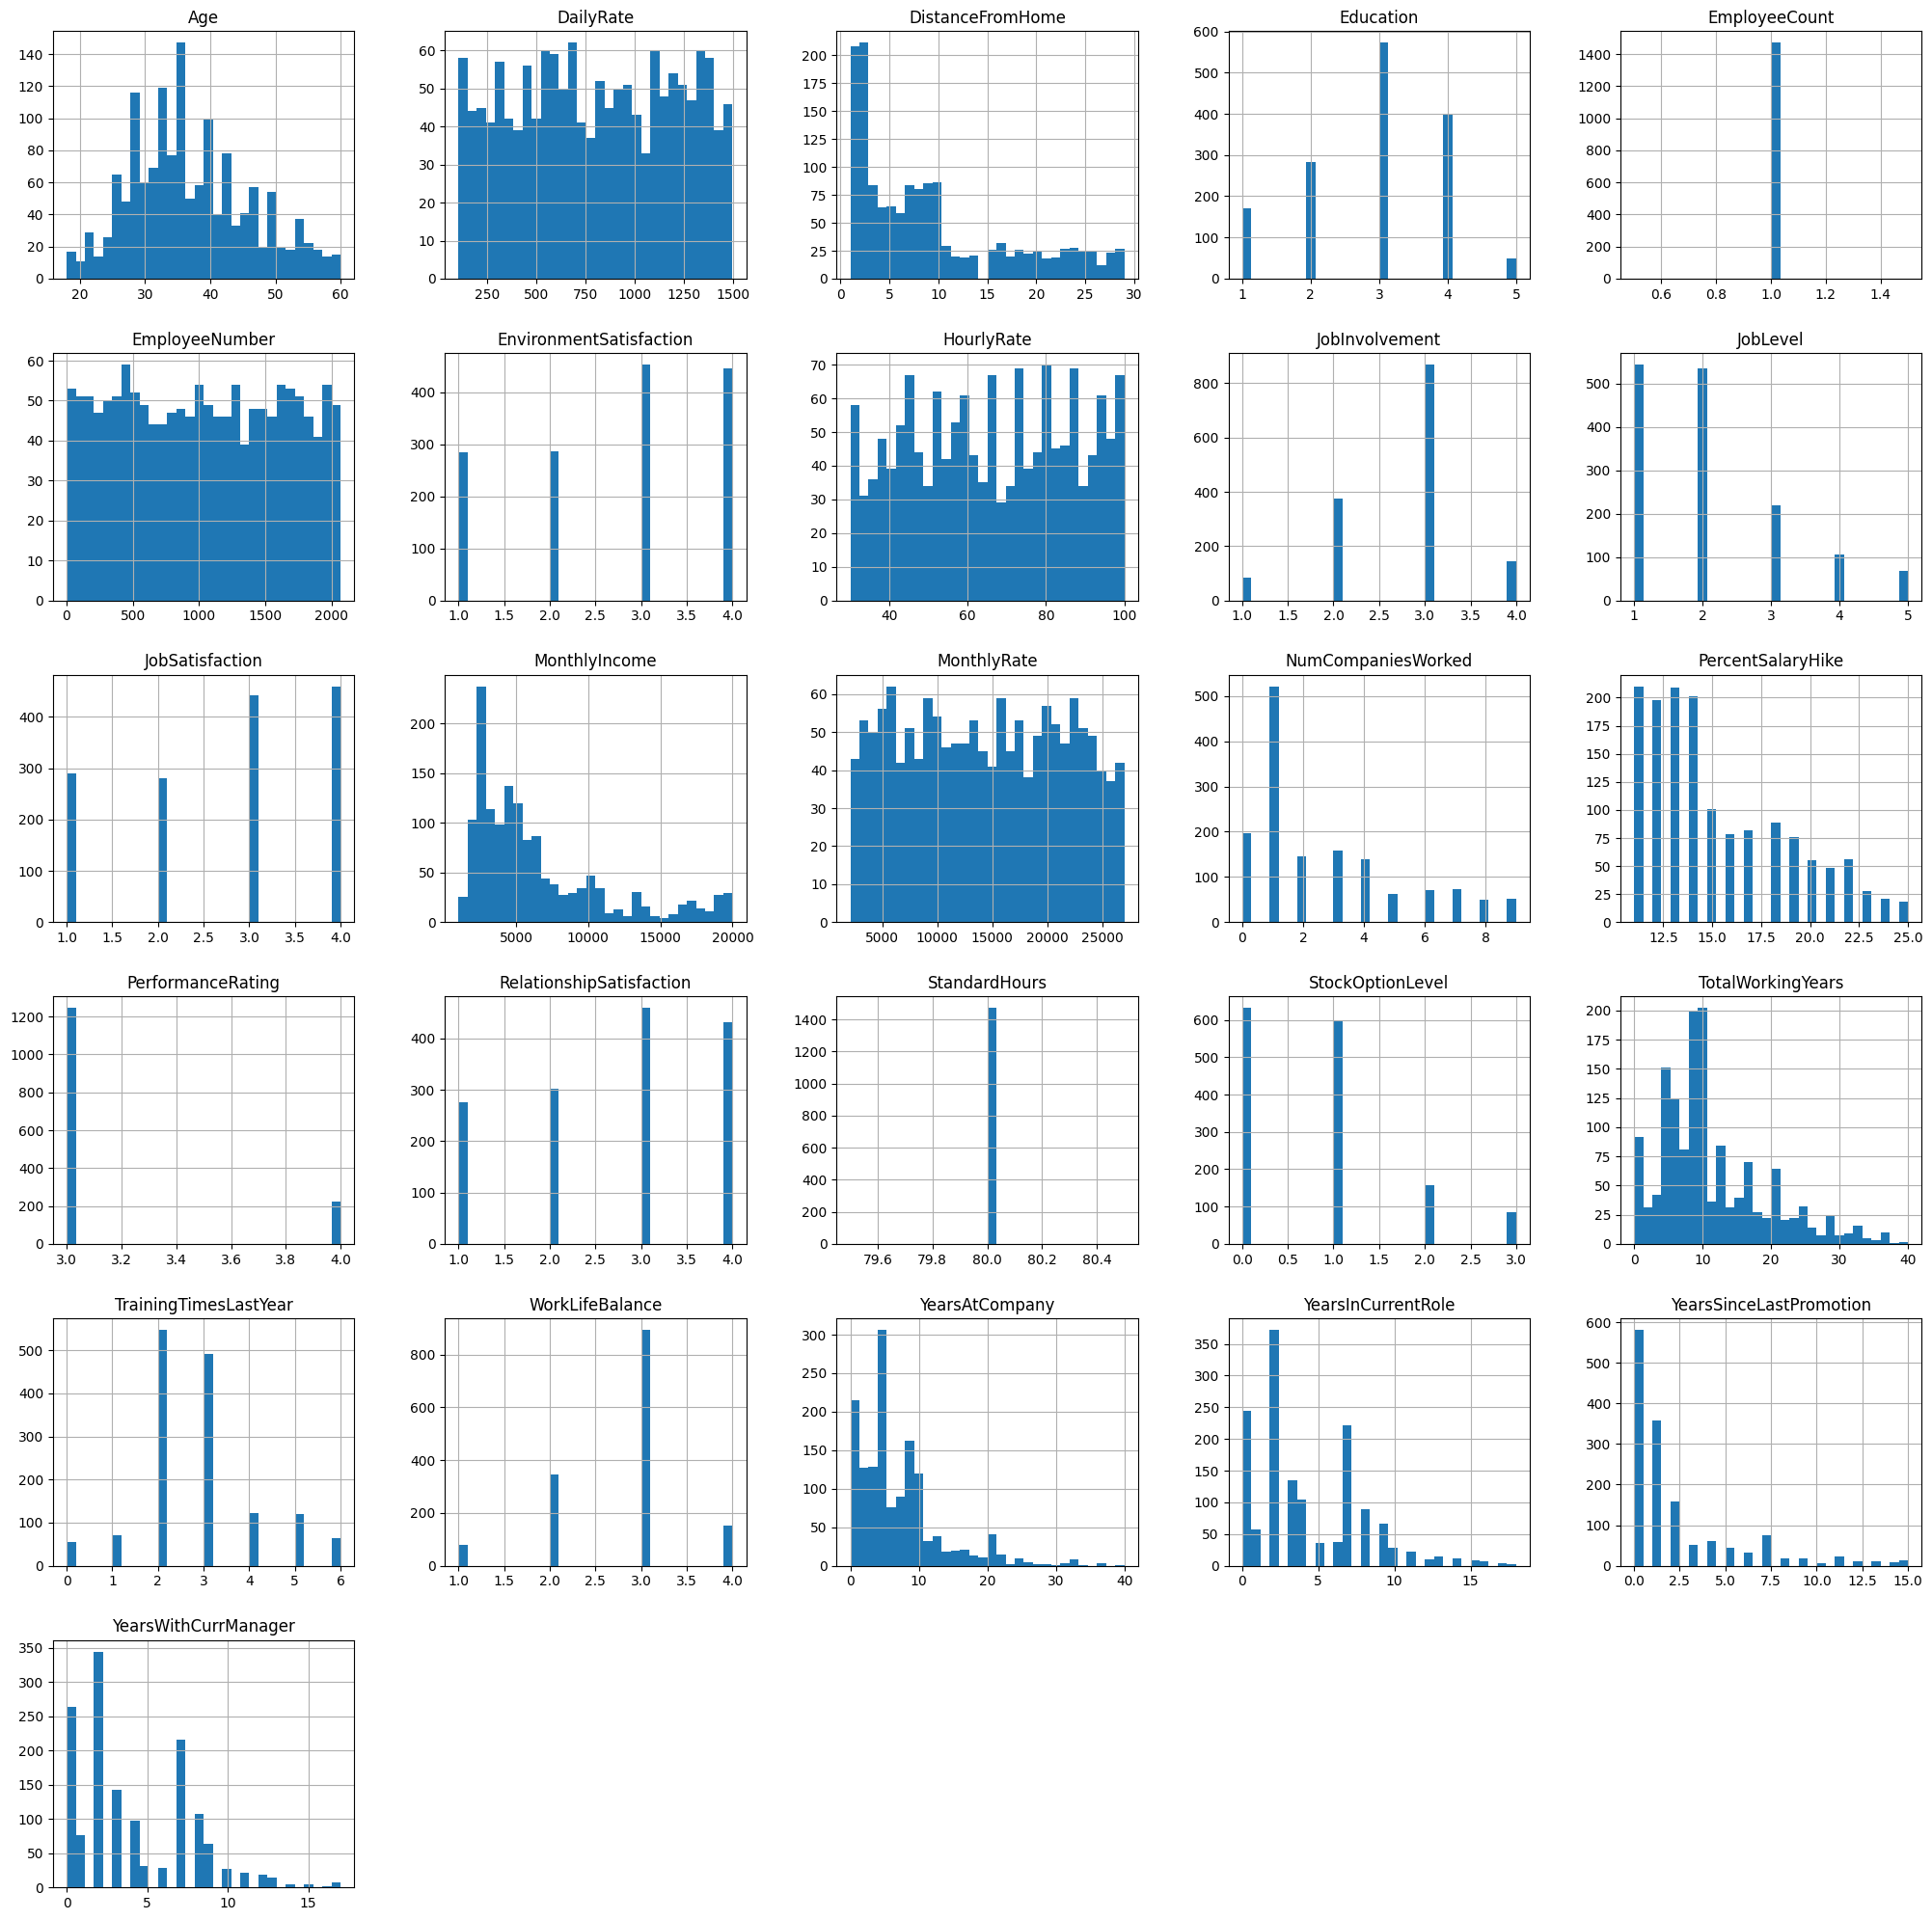

In [4]:
df.hist(figsize=(25, 25), bins = 30);

In [5]:
df.drop(columns = ["EmployeeCount", "StandardHours", "EmployeeNumber"], inplace = True)

In [6]:
data = df.copy()
data["Attrition_n"] = data.Attrition.map({"Yes":1, "No":0})

In [7]:
data['Attrition'] = data['Attrition'].factorize(['No','Yes'])[0]
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0  Female  ...                         1                 0                  8   
1    Male  ...                         4                 1                 10   
2    Male  ...                         2                 0                  7   
3  Female  ...                         3                 0                  8   
4    Male  ...                         4                 1                  6   

  TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                     0                1              6                   4   
1                     3                3             10                   7   
2                     3                3              0                   0   
3                     3                3              8                   7   
4                     3                3              2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition_n  
0                        0                     5           1  
1                        1                     7           0  
2                        0                     0           1  
3                        3                     0           0  
4                        2                     2           0  

[5 rows x 33 columns]

In [8]:
import plotly.offline as py

In [9]:
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = data['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [10]:
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of attrition variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

<AxesSubplot:>

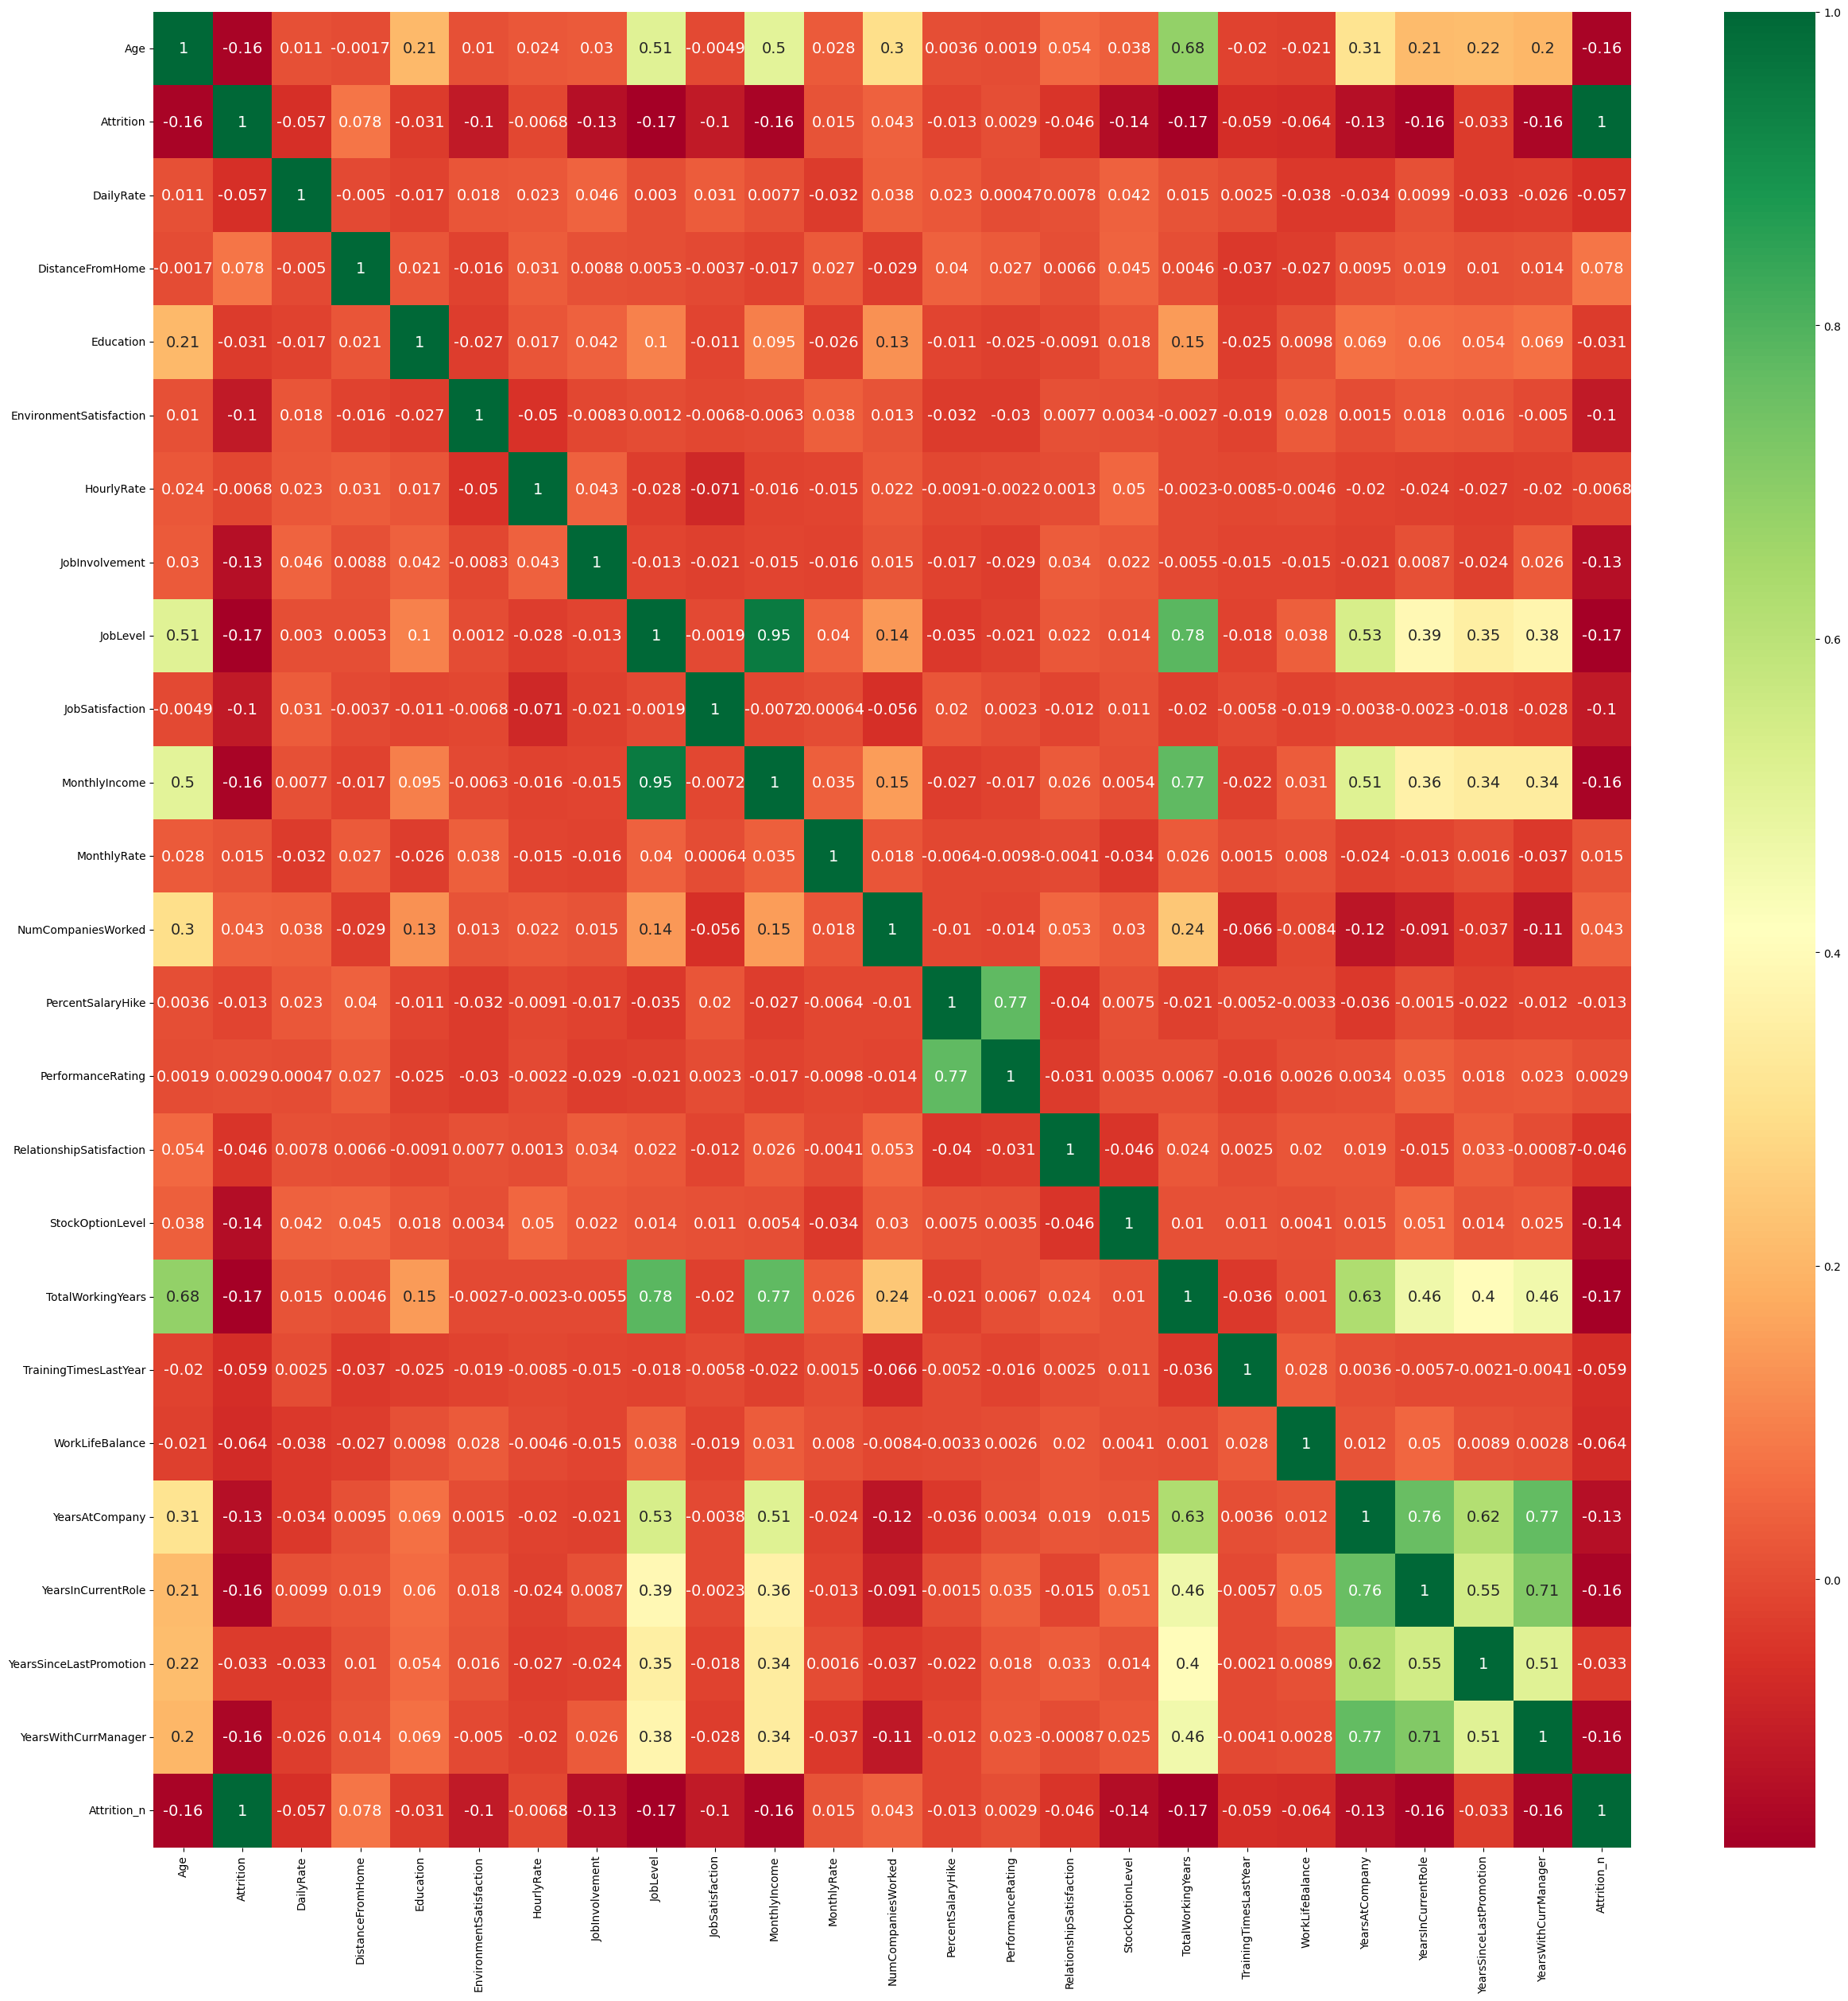

In [11]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":14})

In [12]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = data['Attrition'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [13]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Attrition'] != 0)]
    tmp2 = data[(data['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [14]:
def plot_pie(var_select) :
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [15]:
barplot('Age', False)

We can observe from the association between age and attrition that

1- The age group of 18 to 21 years has the highest attrition rate, with 4 out of 8 employees (i.e., 50%) leaving the organisation by that age. In addition, 6 out of 9 workers quit when they were 19 (66%).

2- There aren't many workers departing the company between the ages of 27 and 50.

3- After age 60, the percentage rises once more.

As a result, we can say that

It's possible that the deceased were in their youth, were unable to handle the demands of their jobs, or had no sense of responsibility.

And it is evident that those over 60 go because of illness problems or advancing age

# How Does Gender Affect Attrition?


In [16]:
plot_pie('Gender')
barplot('Gender', False)

Obviously, there are more men than women working there, thus attrition rates are slightly higher. Gender, in my opinion, is not a major contributing element to attrition.


Therefore, one of the primary causes of attrition is not gender.

# How do business trips affect attrition?

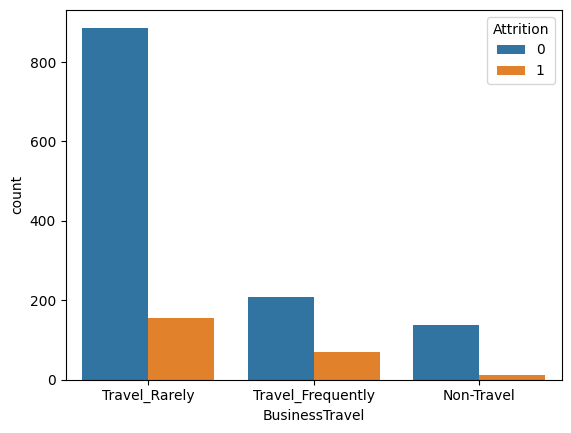

In [17]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=data);

In [18]:
plot_pie('BusinessTravel')
barplot('BusinessTravel', False)


The majority of employees who rarely travel stay with the company. According to the plot, whether or not employers send employees on business trips doesn't actually matter or have a big impact on turnover.



Business travel is therefore not one of the primary factors producing attrition, but those who travel frequently have the highest rate.

# What impact does being far from home have on attrition? ?

In [19]:

barplot('DistanceFromHome', False)

Most of the leaving employees live more than 12 kilometres from the business.

# What Department of Attrition has suffered the most?

In [20]:
plot_pie('Department')



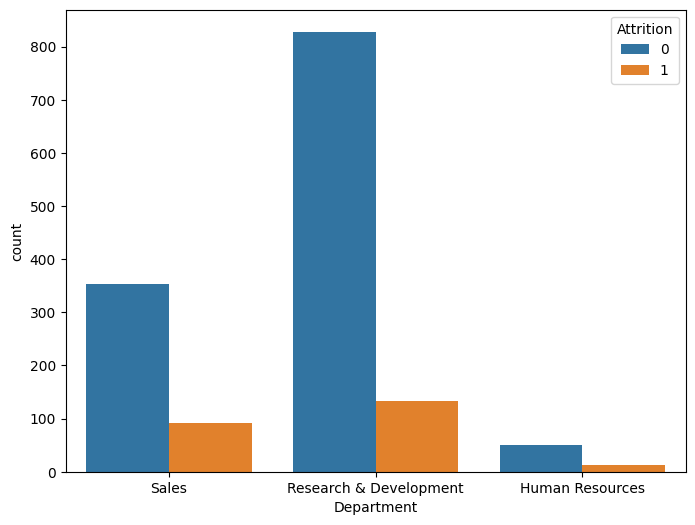

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=data);

In [22]:
data['Department'].value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

The sales department behind the research and development department in terms of attrition rates by a slight margin. Human resources suffer the fewest attritions. However, we must keep in mind that R&D employs a much larger number of people than sales and HR.

The HR department has the highest percentage of attrition when we look at attrition rates by department.

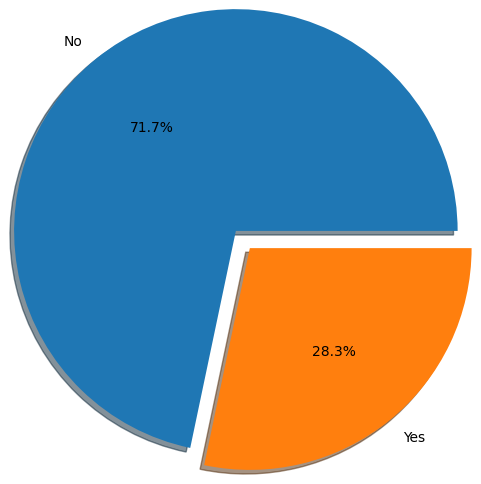

In [23]:
r = data.groupby('OverTime')['OverTime'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

The majority of employees don't put in overtime

In [24]:
numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)

In [25]:
data[numeric_columns].describe()


Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  ...  RelationshipSatisfaction  StockOptionLevel  \
count      1470.000000  ...               1470.000000       1470.000000   
mean          2.728571  ...                  2.712245          0.793878   
std           1.102846  ...                  1.081209          0.852077   
min           1.000000  ...                  1.000000          0.000000   
25%           2.000000  ...                  2.000000          0.000000   
50%           3.000000  ...                  3.000000          1.000000   
75%           4.000000  ...                  4.000000          1.000000   
max           4.000000  ...                  4.000000          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.000000   
mean         7.008163            4.229252                 2.187755   
std          6.126525            3.623137                 3.222430   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%          9.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  Attrition_n  
count           1470.000000  1470.000000  
mean               4.123129     0.161224  
std                3.568136     0.367863  
min                0.000000     0.000000  
25%                2.000000     0.000000  
50%                3.000000     0.000000  
75%                7.000000     0.000000  
max               17.000000     1.000000  

[8 rows x 25 columns]

In [26]:
data[categorical_columns].describe()


BusinessTravel              Department EducationField Gender  \
count            1470                    1470           1470   1470   
unique              3                       3              6      2   
top     Travel_Rarely  Research & Development  Life Sciences   Male   
freq             1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

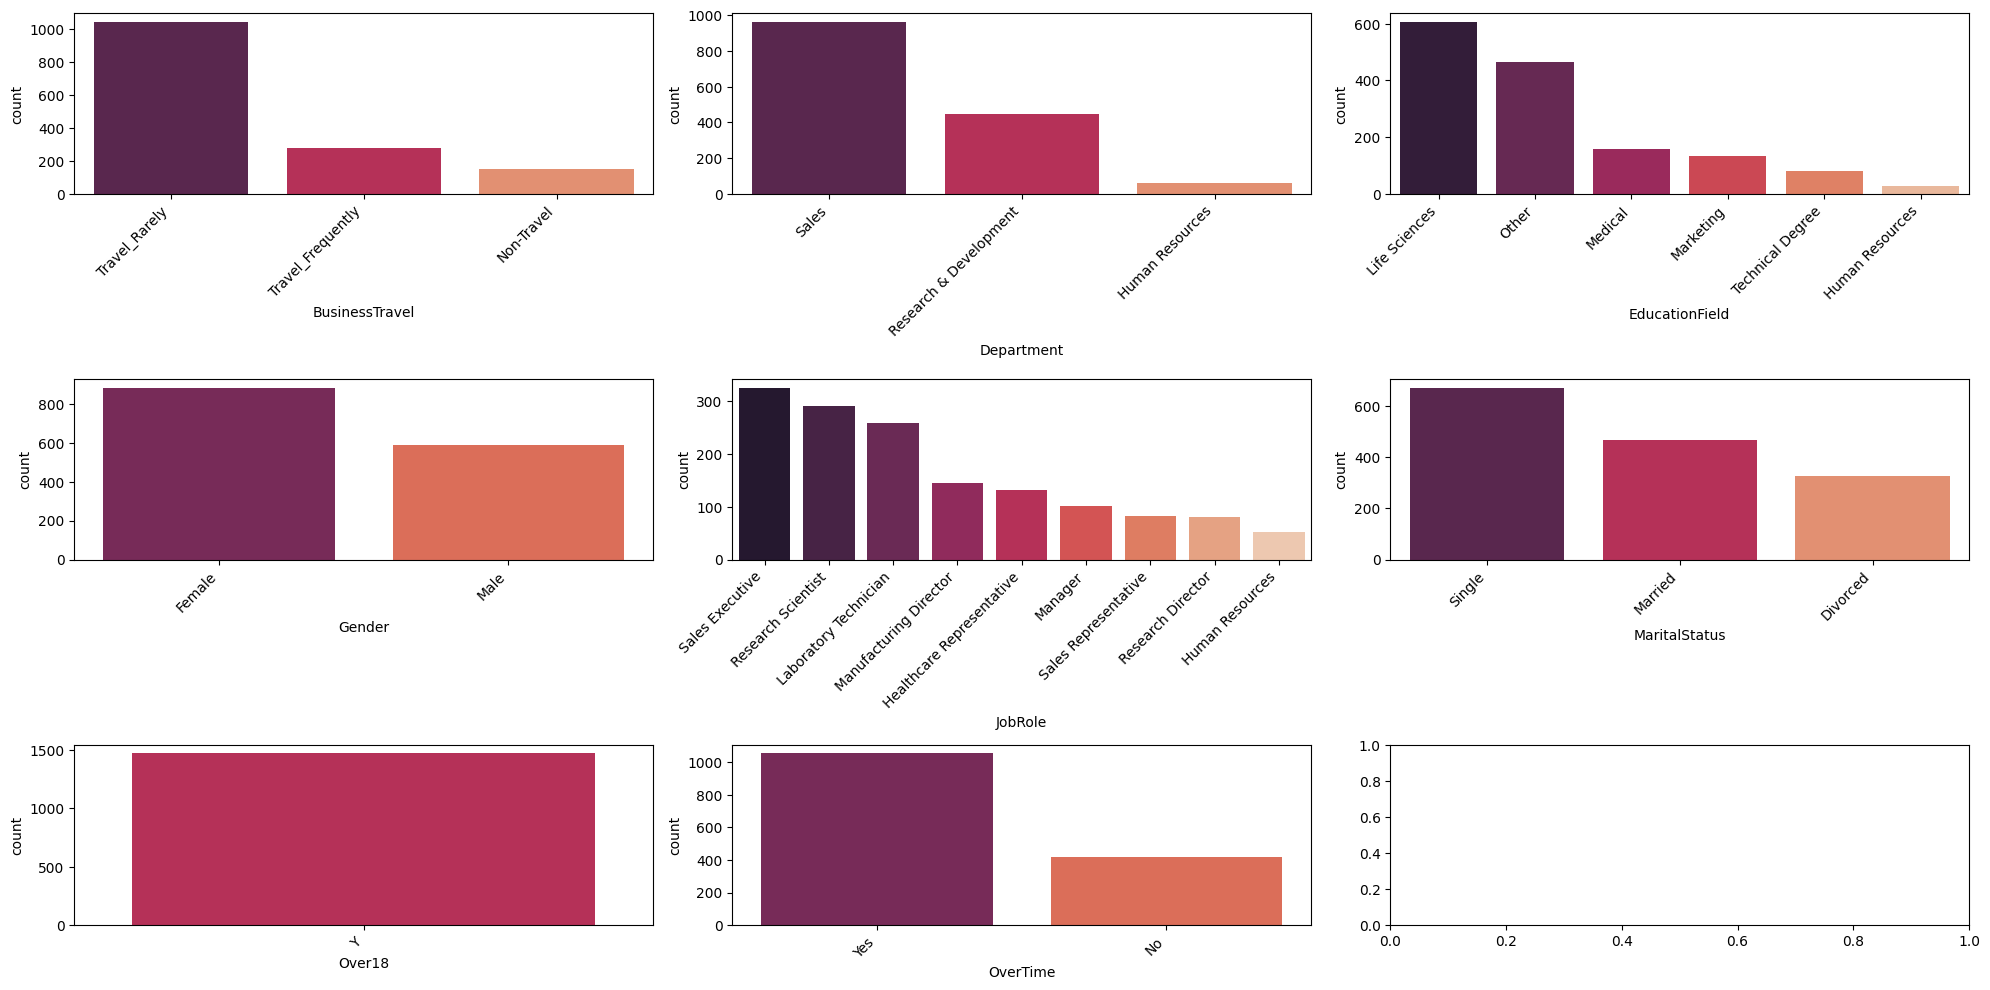

In [27]:
fig, ax = plt.subplots(3,3, figsize = (20,10))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = data, x = categorical_columns[i], ax = ax[i], palette="rocket", order = data[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

Few employees travel frequently, and those over 18 only have one Value.

# What is YearsWithCurrManager's impact on attrition? ?

In [28]:

barplot('YearsWithCurrManager', False)

<AxesSubplot:>

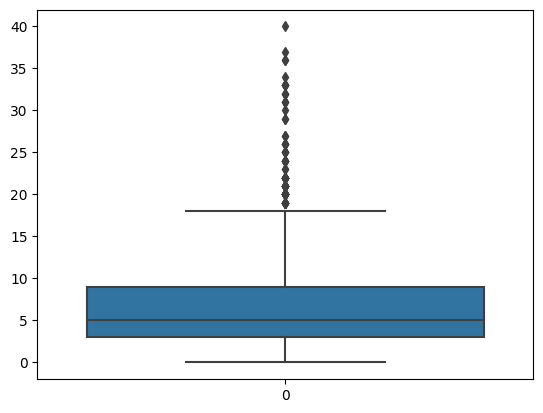

In [29]:
sns.boxplot(data["YearsAtCompany"])

The median stay time of employees at a company is 5 years, ranging from 3 to 9

# What position experiences the greatest attrition?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

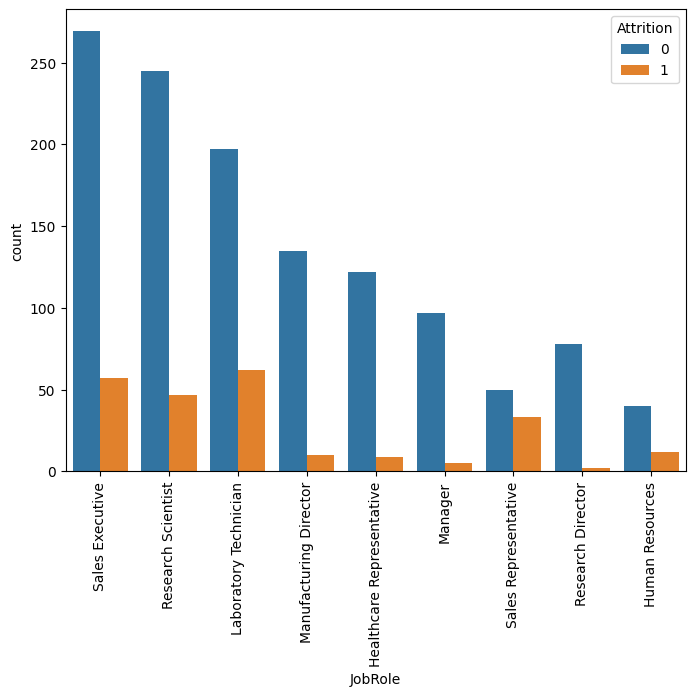

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=data);
plt.xticks(rotation=90)

In [31]:
plot_pie('JobRole')
barplot('JobRole',True)

# Is one of the primary factors the salary?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

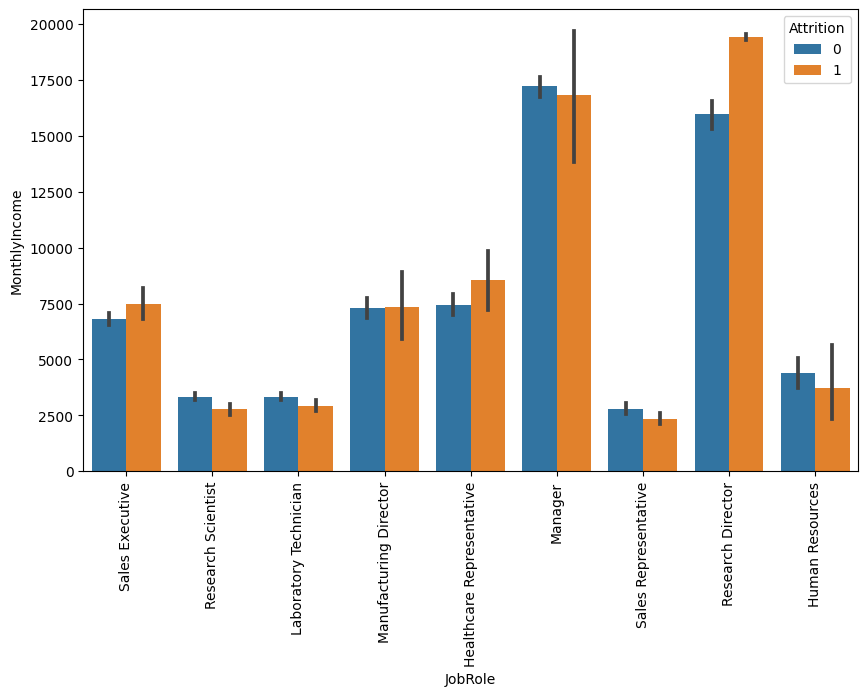

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=data)
plt.xticks(rotation=90)

Laboratory workers, research scientists, sales representatives, and executives all have extremely modest salaries, which may be a significant contributing cause to turnover.

Additionally, as we already saw, the HR department had the highest attrition rate and, as we can see, they also had very low compensation, so consider this once more.

# Does Education Field play a role ?


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

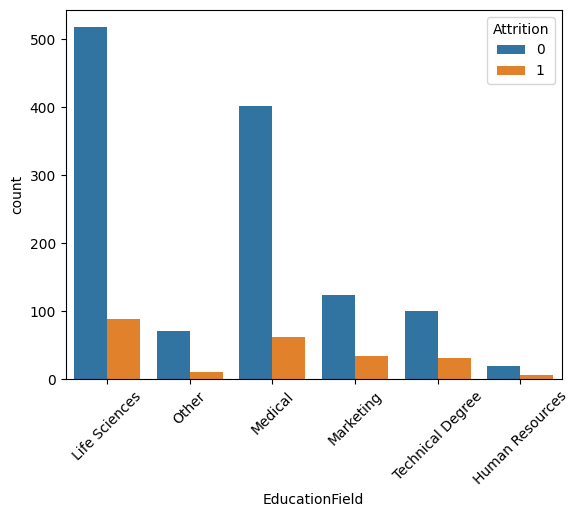

In [33]:
sns.countplot(x='EducationField', hue='Attrition', data=data);
plt.xticks(rotation=45)

In [34]:
plot_pie('EducationField') 
barplot('EducationField',True)

Since the majority of attrition rates are similar, I don't think the degrees of the employees here actually matter.

# Does working overtime stress out employees and force them to quit?


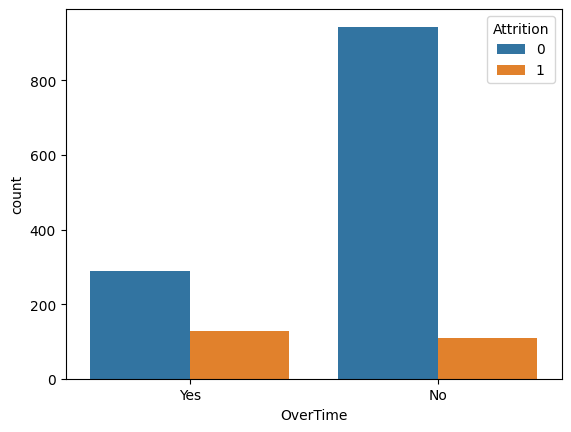

In [35]:
sns.countplot(x='OverTime', hue='Attrition', data=data);


In [36]:
plot_pie('OverTime') 
barplot('OverTime',True)

Additionally, working overtime is not a very important issue. However, it is one of the causes.

# Is it feasible that workers are quitting due to the workplace culture?


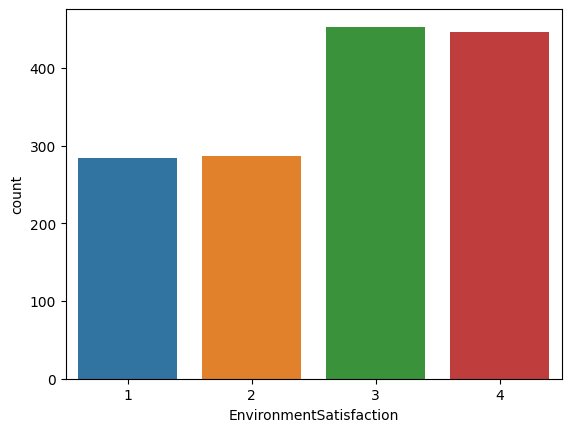

In [37]:
sns.countplot(x='EnvironmentSatisfaction', data=data);
plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)

In [38]:
def make_distplot(data, col, ax):
    sns.distplot(data[col], ax = ax)
    ax.axvline(data[col].mean(), linestyle = '--', color = "red")
    ax.axvline(data[col].median(), linestyle = '--', color = "black")


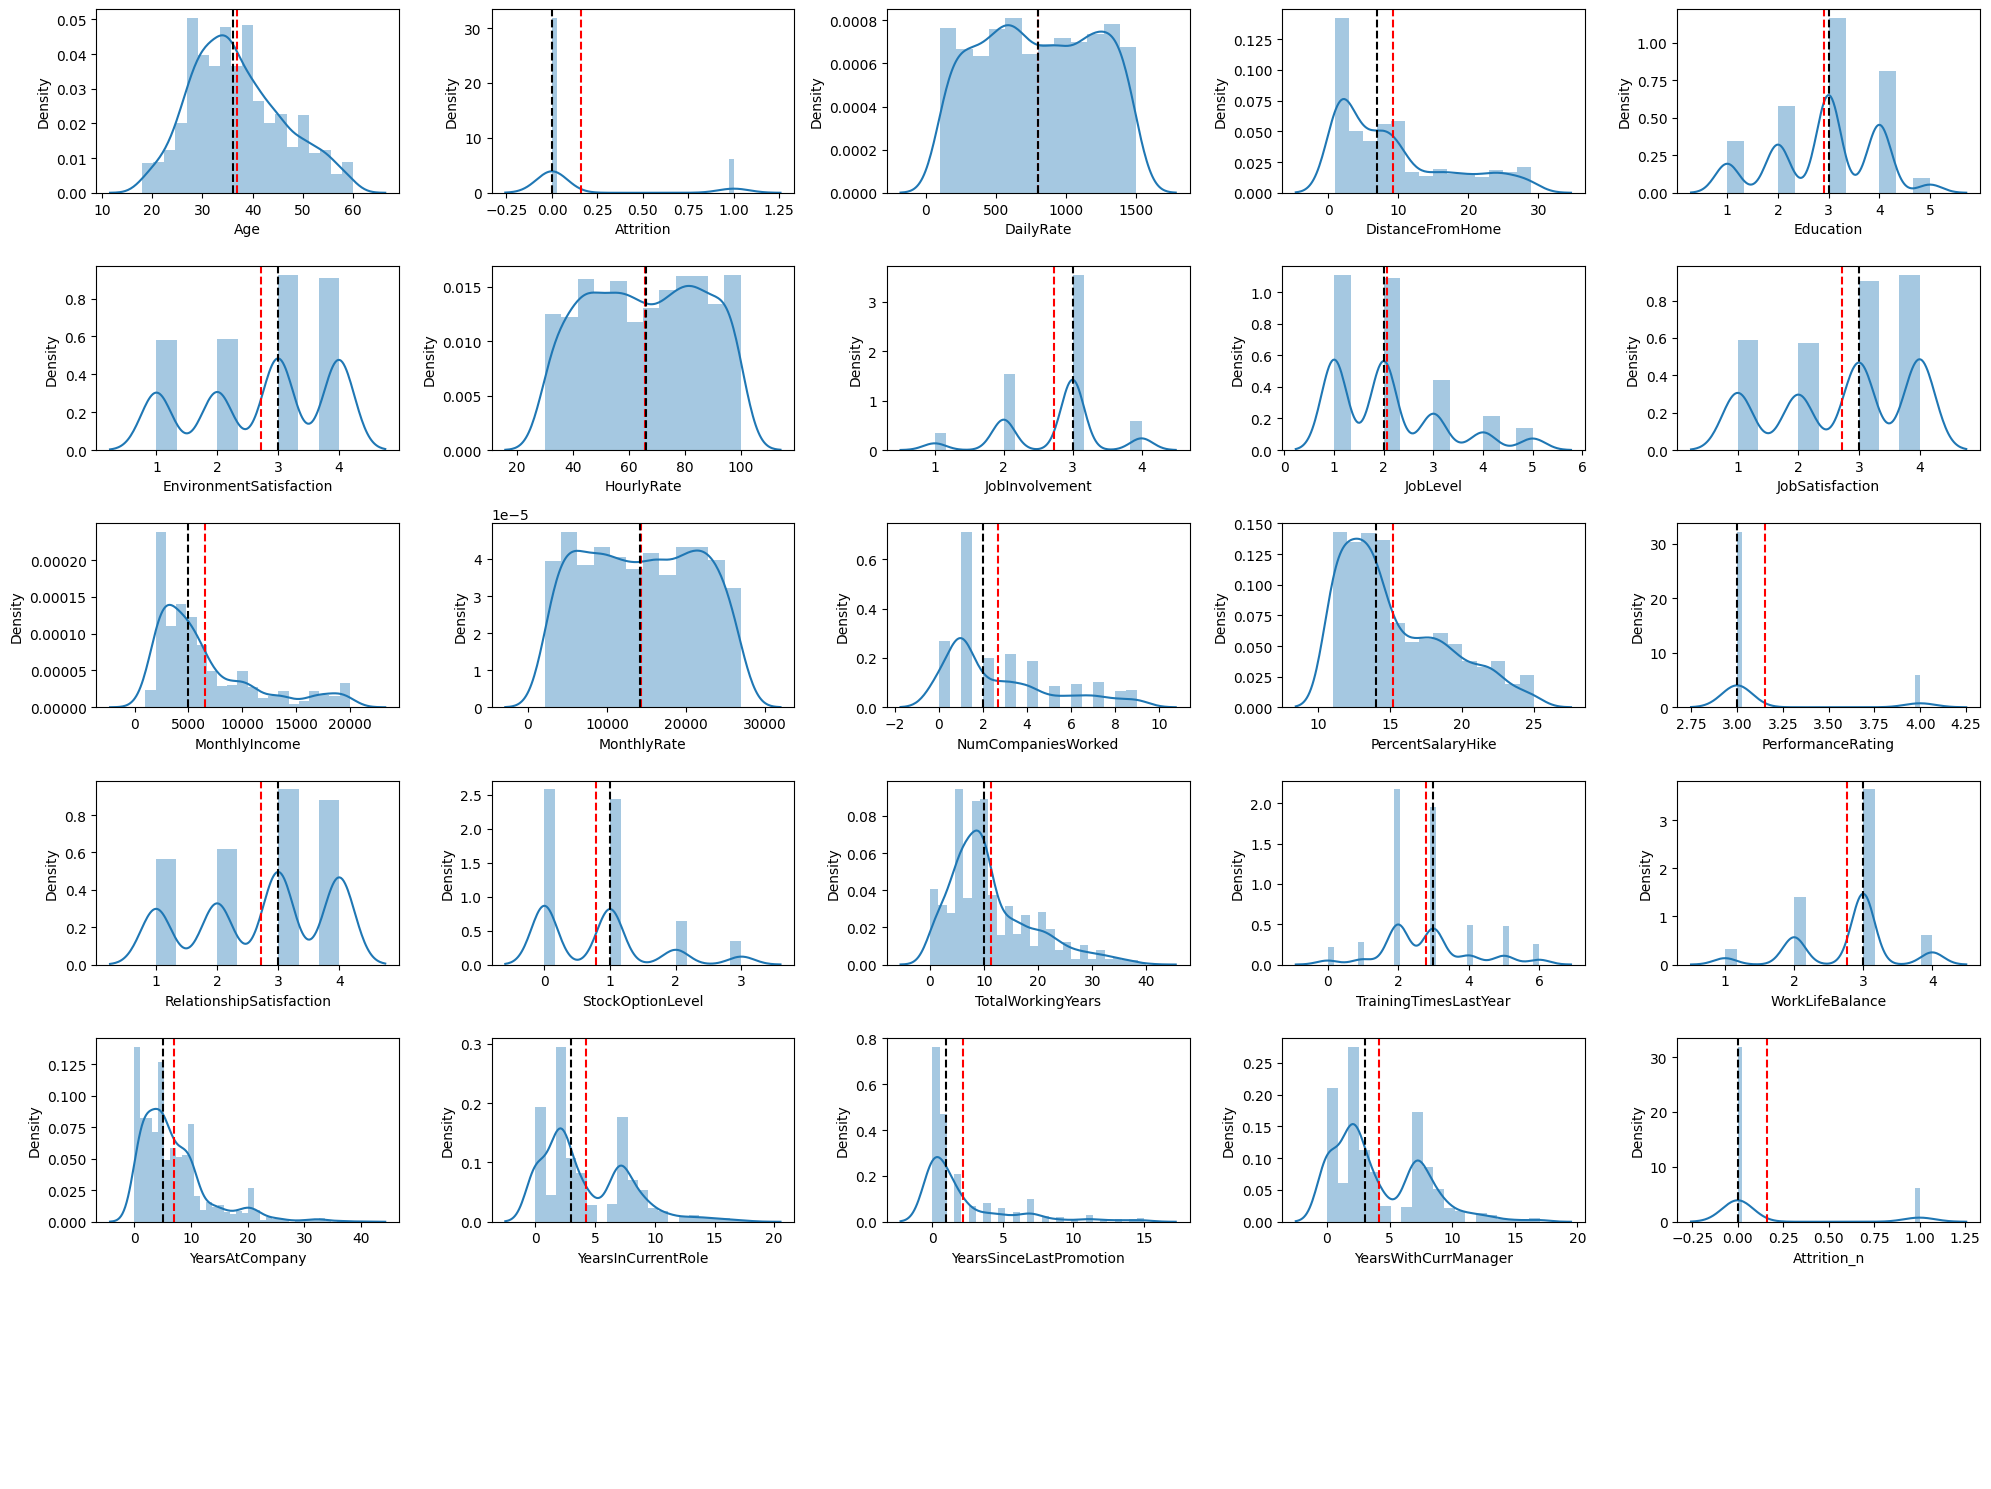

In [39]:
fig, ax = plt.subplots(6,5, figsize = (20,15))

ax = np.ravel(ax)
for i in range(len(numeric_columns)):
    make_distplot(data, numeric_columns[i], ax[i])
for i in range(len(numeric_columns), 6*5):
    ax[i].axis("off")
ax = np.reshape(ax, (6, 5))
plt.tight_layout()

It's odd that some employees work for more than ten years without being promoted.



With a median performance rating of 3.0, the employees' performance isn't the best.



# What elements affect employee attrition the most?

I observe that it is the wage, followed by the age and the absence of workplace promotion.

# What kind of actions should the business take to keep its employees?? 

Increasing pay for workers in some divisions, such sales and HR

And give promotiAnd consistently offer those who earn them promotionsons on a regular basis to those who deserve them

Most of the departing employees reside more than 15 kilometres distant from the business.

Never hire someone younger than 25 years old.

# Feature Engineering

In [40]:
fe_df = df.copy()
fe_df["Attrition"] = fe_df["Attrition"].map({"Yes":1, "No":0})

### 4.1. Features Groupping

In [41]:
all_features = list(fe_df.columns)

numeric_features = list(fe_df.select_dtypes([np.int32, np.int64, np.float32, np.float64]).columns)
# numeric_features includes both numeric features and numeric-encoded ordinal categorical features

ordinal_categorical_features = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction",
                                "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance", "StockOptionLevel"]

target = ["Attrition"]

numeric_features = list(set(numeric_features) - set(ordinal_categorical_features) - set(target))
# now, numeric_features contains only the numeric features

nominal_categorical_features = list( set(all_features) - set(numeric_features) - set(ordinal_categorical_features) - set(target) )

print("Total number of features is", len (all_features))
print("Number of numeric features is", len(numeric_features), "and they are", numeric_features)
print("Number of ordinal categorical features is", len(ordinal_categorical_features), "and they are", ordinal_categorical_features)
print("Number of nominal categorical features is", len(nominal_categorical_features), "and they are", nominal_categorical_features)

Total number of features is 32
Number of numeric features is 14 and they are ['HourlyRate', 'Age', 'YearsAtCompany', 'YearsSinceLastPromotion', 'MonthlyRate', 'TotalWorkingYears', 'PercentSalaryHike', 'DailyRate', 'YearsWithCurrManager', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'NumCompaniesWorked', 'DistanceFromHome', 'MonthlyIncome']
Number of ordinal categorical features is 9 and they are ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']
Number of nominal categorical features is 8 and they are ['Gender', 'Over18', 'BusinessTravel', 'OverTime', 'Department', 'JobRole', 'EducationField', 'MaritalStatus']


### 4.2. Correlation between Numerical Feautres

<AxesSubplot:>

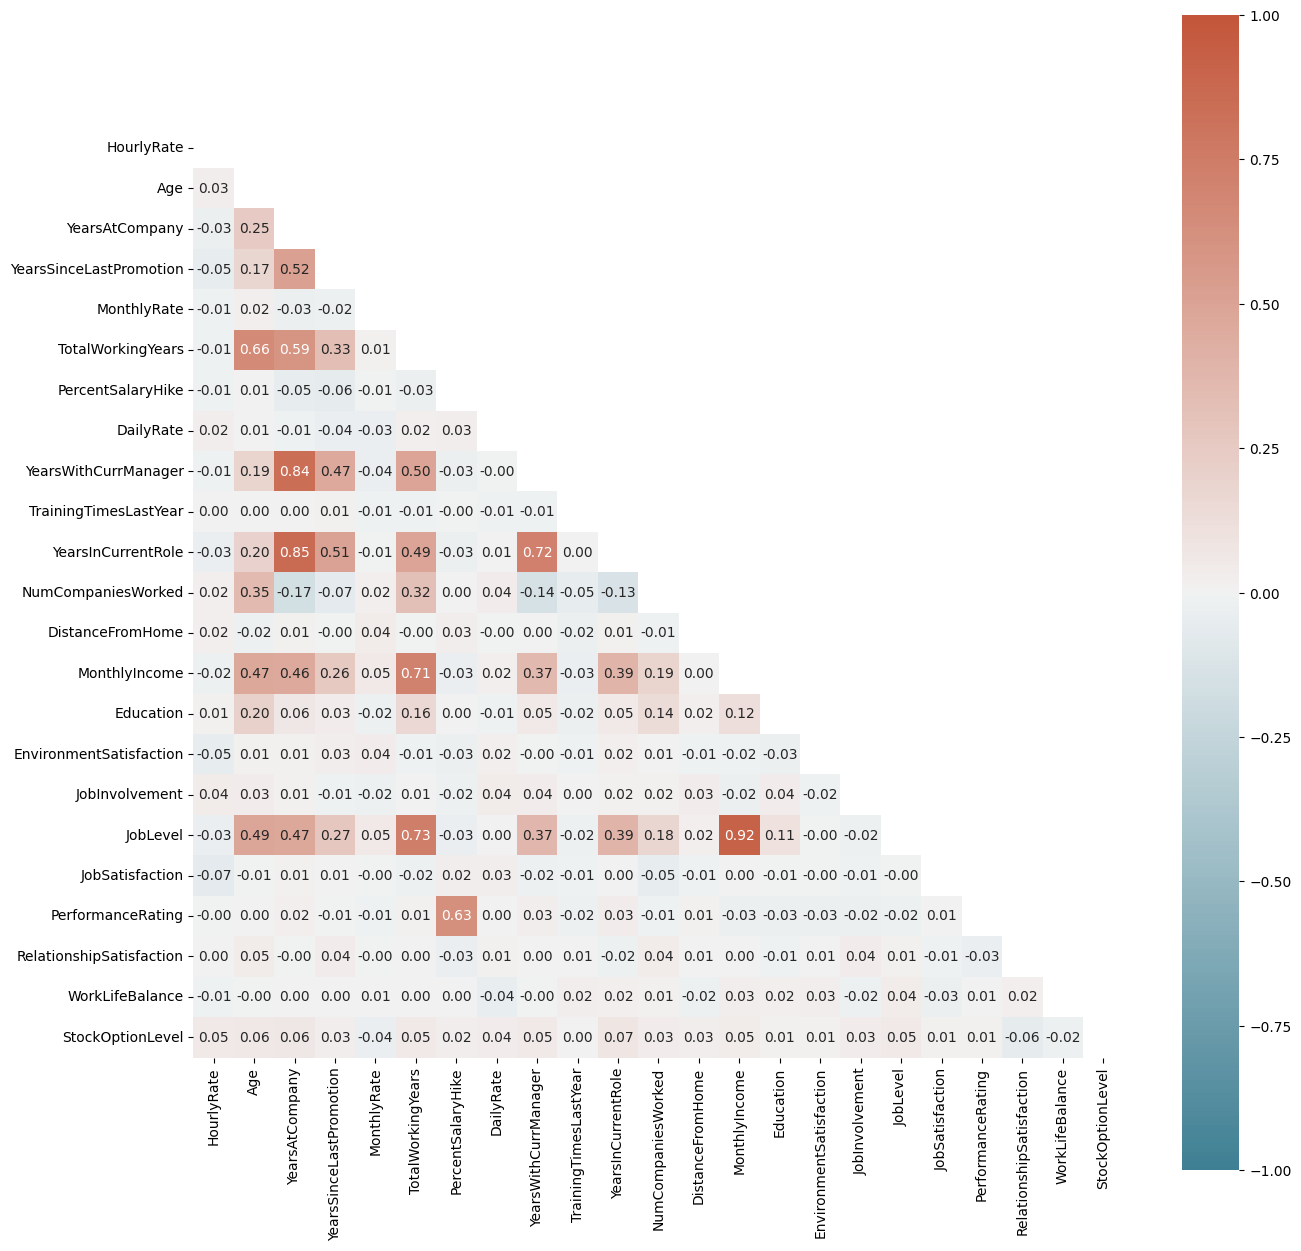

In [42]:
ordinal_features = numeric_features + ordinal_categorical_features

corr_matrix = fe_df[ordinal_features].corr(method = "spearman")

heatmap_cmap = sns.diverging_palette(220, 20,  as_cmap=True)
heatmap_mask = np.triu(np.ones_like(corr_matrix), k = 0)

plt.figure(figsize = (15, 15))
sns.heatmap(
    corr_matrix,
    cmap = heatmap_cmap,
    square = True,
    annot = True,
    fmt = ".2f",
    mask = heatmap_mask,
    vmin = -1,
    vmax = 1
)

The heatmap shown above reveals various features to have substantial relationships with one another:

-YearsAtCompany as well as Years With Current Manager

-years at company, years in current role

-monthly income, and level of employment


By carrying out the following, we can discover these features [YearsAtCompany, MonthlyIncome] automatically:

In [43]:
upper_corr = corr_matrix.where(~(heatmap_mask.astype(bool)))
columns_to_drop = [col for col in upper_corr.columns if any(upper_corr[col] > 0.8)]
columns_to_drop

['YearsAtCompany', 'MonthlyIncome']

Now, we can drop them.

In [44]:
for col in columns_to_drop:
    numeric_features.remove(col)

In [45]:
fe_df.drop(columns = columns_to_drop, inplace = True)

<AxesSubplot:>

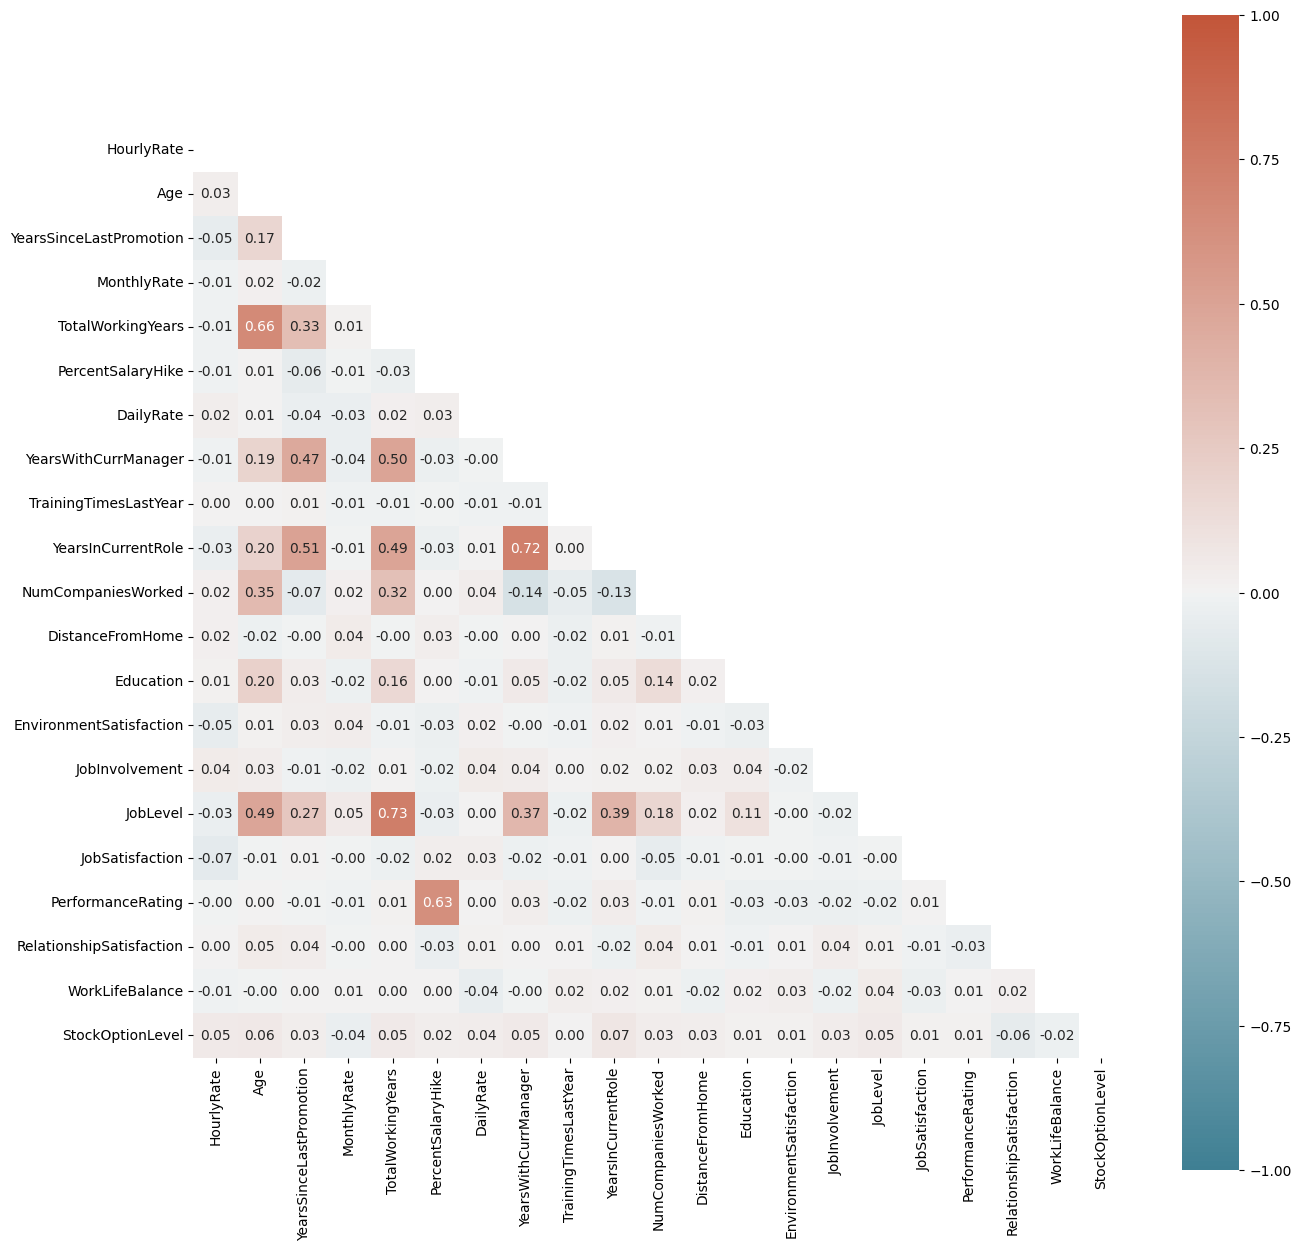

In [46]:
ordinal_features = numeric_features + ordinal_categorical_features

corr_matrix = fe_df[ordinal_features].corr(method = "spearman")

heatmap_cmap = sns.diverging_palette(220, 20,  as_cmap=True)
heatmap_mask = np.triu(np.ones_like(corr_matrix), k = 0)

plt.figure(figsize = (15, 15))
sns.heatmap(
    corr_matrix,
    cmap = heatmap_cmap,
    square = True,
    annot = True,
    fmt = ".2f",
    mask = heatmap_mask,
    vmin = -1,
    vmax = 1
)

### 4.3. Correlation between Numeric Features and Target

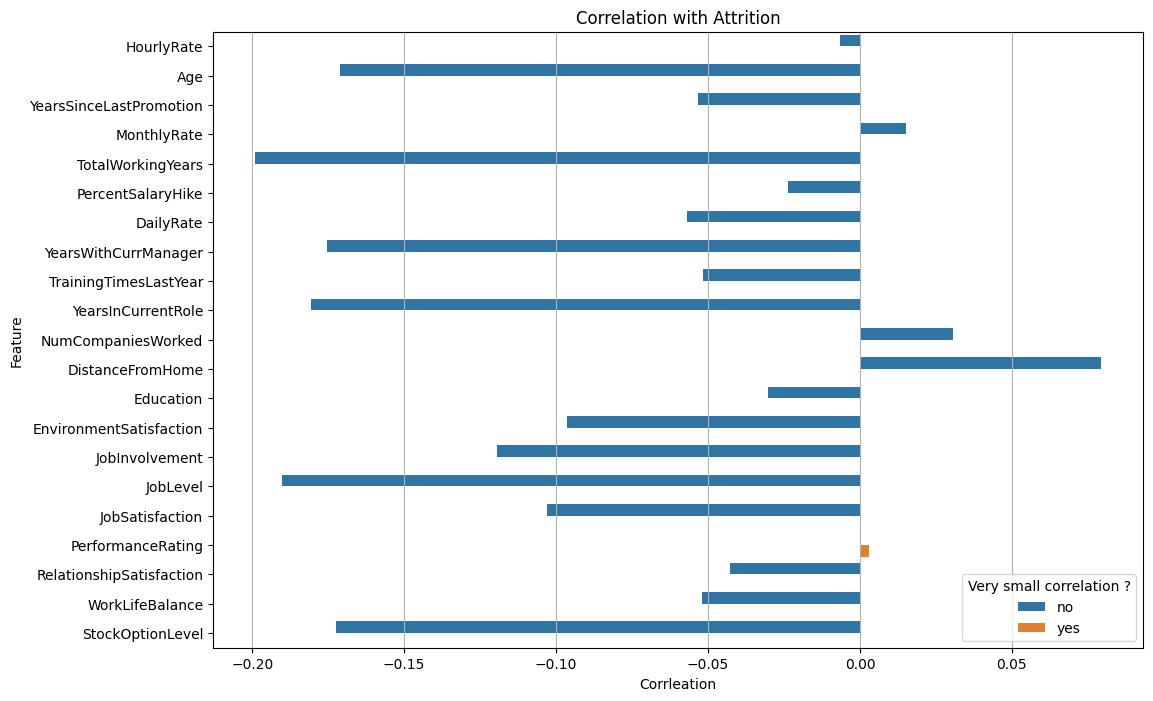

In [47]:
ordinal_features = numeric_features + ordinal_categorical_features
corr_num_with_target = pd.DataFrame(fe_df[ordinal_features].corrwith(fe_df.Attrition, method = "spearman"), columns = ["correlation"]).reset_index()
corr_num_with_target["highlight"] = corr_num_with_target.correlation.apply(lambda corr : "yes" if abs(corr) <= 0.005 else "no")

plt.figure(figsize=(12, 8))
plt.grid(True, axis = "both")
sns.barplot(
    data = corr_num_with_target,
    y = "index",
    x = "correlation",
    hue = "highlight"
)
plt.ylabel("Feature")
plt.xlabel("Corrleation")
plt.title("Correlation with Attrition")
plt.legend(title = "Very small correlation ?", loc = 4)
plt.show()

As we already noted, there isn't a strong correlation between the target and "PerformanceRating." Thus ought should be eliminated.

In [48]:
ordinal_categorical_features.remove("PerformanceRating")
fe_df.drop(columns = ["PerformanceRating"], inplace = True)

### 4.4. Correlation between Categorical Features and Target

In [49]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OrdinalEncoder

In [50]:
nominal_categorical_df = fe_df[nominal_categorical_features].copy()
nominal_categorical_df.head()

Gender Over18     BusinessTravel OverTime              Department  \
0  Female      Y      Travel_Rarely      Yes                   Sales   
1    Male      Y  Travel_Frequently       No  Research & Development   
2    Male      Y      Travel_Rarely      Yes  Research & Development   
3  Female      Y  Travel_Frequently      Yes  Research & Development   
4    Male      Y      Travel_Rarely       No  Research & Development   

                 JobRole EducationField MaritalStatus  
0        Sales Executive  Life Sciences        Single  
1     Research Scientist  Life Sciences       Married  
2  Laboratory Technician          Other        Single  
3     Research Scientist  Life Sciences       Married  
4  Laboratory Technician        Medical       Married

In [51]:
oe = OrdinalEncoder()
nominal_categorical_encoded_df = oe.fit_transform(nominal_categorical_df)
nominal_categorical_encoded_df = pd.DataFrame(nominal_categorical_encoded_df, columns = nominal_categorical_df.columns)
nominal_categorical_encoded_df.head()

Gender  Over18  BusinessTravel  OverTime  Department  JobRole  \
0     0.0     0.0             2.0       1.0         2.0      7.0   
1     1.0     0.0             1.0       0.0         1.0      6.0   
2     1.0     0.0             2.0       1.0         1.0      2.0   
3     0.0     0.0             1.0       1.0         1.0      6.0   
4     1.0     0.0             2.0       0.0         1.0      2.0   

   EducationField  MaritalStatus  
0             1.0            2.0  
1             1.0            1.0  
2             4.0            2.0  
3             1.0            1.0  
4             3.0            1.0

In [52]:
sk = SelectKBest(score_func = chi2, k = "all")
X_categorical = nominal_categorical_encoded_df.values
y = fe_df.Attrition
sk.fit(X_categorical, y)
sk.scores_

array([5.10086544e-01,            nan, 2.20269350e-06, 6.38450667e+01,
       1.32929732e+00, 9.00444847e+00, 8.34911631e-01, 1.87456575e+01])

We can see that `Over18` has a single unique value `Y`. So, it should be removed.

In [53]:
nominal_categorical_features.remove("Over18")

In [54]:
fe_df.drop(columns = ["Over18"], inplace = True)

Also, according to chi-2, the target isn't dependent on `BusinessTravel` but I decided to keep it as from its visualization, it gave meaningful insights about the relationship between it and the target. 

In [55]:
columns_dropped_during_fe = list(set(df.columns) - set(fe_df.columns))
columns_dropped_during_fe

['PerformanceRating', 'YearsAtCompany', 'Over18', 'MonthlyIncome']

## 5. Modelling

For machine learning modelling, I will try to focus on 2 things:
* Get each feature contribution (i.e., coefficient, importance) for some models
* Focus on the recall as we should try to minimize ***false negatives*** (i.e., predict an employee will stay when he is actually leaving).

In [56]:
ml_df = df.copy().drop(columns=columns_dropped_during_fe)
ml_df.Attrition = ml_df.Attrition.map({"Yes":1, "No":0})

In [57]:
for numeric_feature in numeric_features:
    if ml_df[numeric_feature].skew() > 0.75:
        ml_df[numeric_feature] = np.log1p(ml_df[numeric_feature])

In [58]:
for nominal_categorical_feature in nominal_categorical_features:
    categorical_dummies = pd.get_dummies(ml_df[nominal_categorical_feature], prefix = "NOM_{}".format(nominal_categorical_feature), drop_first = True)
    ml_df = pd.concat([ml_df, categorical_dummies], axis = 1)

ml_df.drop(columns = nominal_categorical_features, inplace = True)
ml_df.columns = ml_df.columns.str.replace(" ", "")
ml_df.head().T

0             1            2  \
Age                                      41.000000     49.000000    37.000000   
Attrition                                 1.000000      0.000000     1.000000   
DailyRate                              1102.000000    279.000000  1373.000000   
DistanceFromHome                          0.693147      2.197225     1.098612   
Education                                 2.000000      1.000000     2.000000   
EnvironmentSatisfaction                   2.000000      3.000000     4.000000   
HourlyRate                               94.000000     61.000000    92.000000   
JobInvolvement                            3.000000      2.000000     2.000000   
JobLevel                                  2.000000      2.000000     1.000000   
JobSatisfaction                           4.000000      2.000000     3.000000   
MonthlyRate                           19479.000000  24907.000000  2396.000000   
NumCompaniesWorked                        2.197225      0.693147     1.945910   
PercentSalaryHike                         2.484907      3.178054     2.772589   
RelationshipSatisfaction                  1.000000      4.000000     2.000000   
StockOptionLevel                          0.000000      1.000000     0.000000   
TotalWorkingYears                         2.197225      2.397895     2.079442   
TrainingTimesLastYear                     0.000000      3.000000     3.000000   
WorkLifeBalance                           1.000000      3.000000     3.000000   
YearsInCurrentRole                        1.609438      2.079442     0.000000   
YearsSinceLastPromotion                   0.000000      0.693147     0.000000   
YearsWithCurrManager                      1.791759      2.079442     0.000000   
NOM_Gender_Male                           0.000000      1.000000     1.000000   
NOM_BusinessTravel_Travel_Frequently      0.000000      1.000000     0.000000   
NOM_BusinessTravel_Travel_Rarely          1.000000      0.000000     1.000000   
NOM_OverTime_Yes                          1.000000      0.000000     1.000000   
NOM_Department_Research&Development       0.000000      1.000000     1.000000   
NOM_Department_Sales                      1.000000      0.000000     0.000000   
NOM_JobRole_HumanResources                0.000000      0.000000     0.000000   
NOM_JobRole_LaboratoryTechnician          0.000000      0.000000     1.000000   
NOM_JobRole_Manager                       0.000000      0.000000     0.000000   
NOM_JobRole_ManufacturingDirector         0.000000      0.000000     0.000000   
NOM_JobRole_ResearchDirector              0.000000      0.000000     0.000000   
NOM_JobRole_ResearchScientist             0.000000      1.000000     0.000000   
NOM_JobRole_SalesExecutive                1.000000      0.000000     0.000000   
NOM_JobRole_SalesRepresentative           0.000000      0.000000     0.000000   
NOM_EducationField_LifeSciences           1.000000      1.000000     0.000000   
NOM_EducationField_Marketing              0.000000      0.000000     0.000000   
NOM_EducationField_Medical                0.000000      0.000000     0.000000   
NOM_EducationField_Other                  0.000000      0.000000     1.000000   
NOM_EducationField_TechnicalDegree        0.000000      0.000000     0.000000   
NOM_MaritalStatus_Married                 0.000000      1.000000     0.000000   
NOM_MaritalStatus_Single                  1.000000      0.000000     1.000000   

                                                 3             4  
Age                                      33.000000     27.000000  
Attrition                                 0.000000      0.000000  
DailyRate                              1392.000000    591.000000  
DistanceFromHome                          1.386294      1.098612  
Education                                 4.000000      1.000000  
EnvironmentSatisfaction                   4.000000      1.000000  
HourlyRate                               56.000000     40.000000  
JobInvolvement               

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [60]:
X = ml_df.drop(columns=["Attrition"])
y = ml_df.Attrition

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [62]:
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In our training, and also test because we used stratified splitting, there is imbalance between the 2 classes of the target.

In [63]:
y_train.value_counts() * 100 / y_train.value_counts().sum()

0    83.867833
1    16.132167
Name: Attrition, dtype: float64

In [64]:
y_test.value_counts() * 100 / y_test.value_counts().sum()

0    83.900227
1    16.099773
Name: Attrition, dtype: float64

If we predicted that any employee will stay, we will have a train, and again also a test, accuracy of 84%. Which is numerically is a good value, however, we will predict any employee leaving. Predicting that employee will leave is much more important.

In [65]:
def get_model_feature_importances(data, model, coef = False):
    fi_df = pd.DataFrame()
    fi_df["feature"] = data.columns
    sort_col = None
    if not coef:
        fi_df["importance"] = model.feature_importances_
    else:
        fi_df["importance"] = model.coef_.ravel()
    
    importances_sum = fi_df["importance"].apply(abs).sum()
    fi_df["normalized_importance"] = fi_df["importance"].apply(abs) / importances_sum * 100
    fi_df.sort_values("importance", ascending = False, ignore_index = True, inplace = True)
    return fi_df

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, recall_score, precision_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("==========TRAINING RESULTS===========")
    train_report_df = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
    print(f"Precision: {precision_score(y_train, y_train_pred)}")
    print(f"Recall: {recall_score(y_train, y_train_pred)}")
    print(f"Classification Report:\n{train_report_df}")
    
    print("\n==========TESTING  RESULTS===========")
    test_report_df = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Precision: {precision_score(y_test, y_test_pred)}")
    print(f"Recall: {recall_score(y_test, y_test_pred)}")
    print(f"Classification Report:\n{test_report_df}")

In [67]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_curve(model, X, y):
    y_prob = model.predict_proba(X)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y, y_prob)
    fpr, tpr, thresholds_ = roc_curve(y, y_prob)
    gmeans = np.sqrt(tpr * (1 - fpr))
    idx = np.argmax(gmeans)
    best_threshold = thresholds_[idx]
    
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.axvline(x = best_threshold, label = "Best Threshold", color='red', linestyle='dotted')
    plt.xlabel("Thresholds")
    plt.legend()
    plt.title("Precision/Recall Tradeoff")
    
def plot_roc_curve(model, X, y):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    
    gmeans = np.sqrt(tpr * (1 - fpr))
    idx = np.argmax(gmeans)
    best_threshold = thresholds[idx]
    
    plt.plot(fpr, tpr, linewidth = 2)
    plt.annotate("Best Threshold: {:.2f}".format(best_threshold), xy=(fpr[idx], tpr[idx]), xytext=(fpr[idx], tpr[idx] + 0.1), arrowprops=dict(arrowstyle="->", color = "black"), fontsize = 8, ha = "center")
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for {} with Area of {:.2f}".format(model.__class__.__name__, roc_auc_score(y, y_prob)), fontsize = 10)

### 5.1. Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(solver = "liblinear", penalty = "l1", random_state = 42)
logistic_regression_model.fit(X_train, y_train)
evaluate_model(logistic_regression_model, X_train, X_test, y_train, y_test)

==========TRAINING RESULTS===========
Confusion Matrix:
[[843  20]
 [ 83  83]]
Accuracy: 0.8999028182701652
Precision: 0.8058252427184466
Recall: 0.5
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.910367    0.805825  0.899903     0.858096      0.893502
recall       0.976825    0.500000  0.899903     0.738413      0.899903
f1-score     0.942426    0.617100  0.899903     0.779763      0.889944
support    863.000000  166.000000  0.899903  1029.000000   1029.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[359  11]
 [ 46  25]]
Accuracy: 0.8707482993197279
Precision: 0.6944444444444444
Recall: 0.352112676056338
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.886420   0.694444  0.870748    0.790432      0.855512
recall       0.970270   0.352113  0.870748    0.661191      0.870748
f1-score     0.926452   0.467290  0.870748    0.696871      0.852528
support 

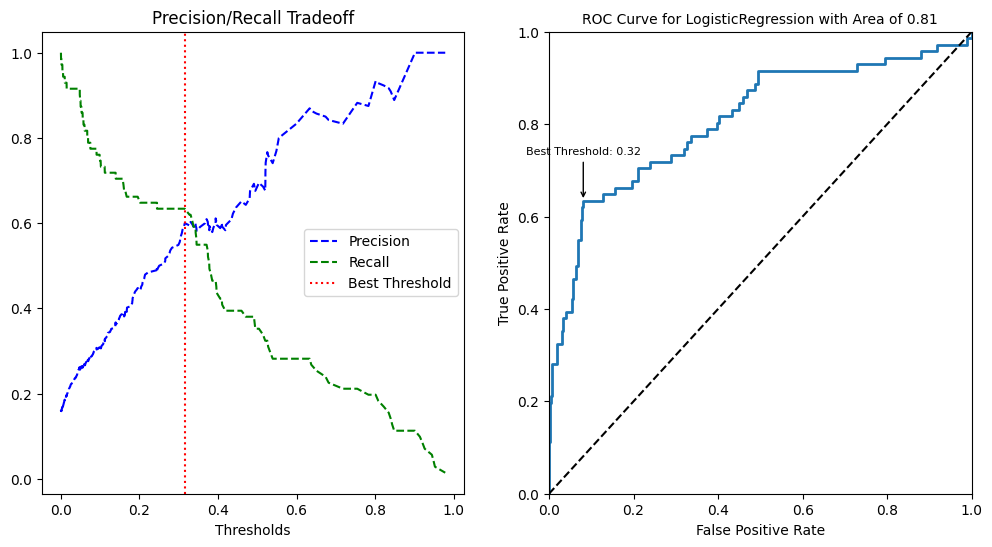

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(logistic_regression_model, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(logistic_regression_model, X_test, y_test)

Text(0.5, 1.0, 'Normalized Coefficient (%) for each Feature')

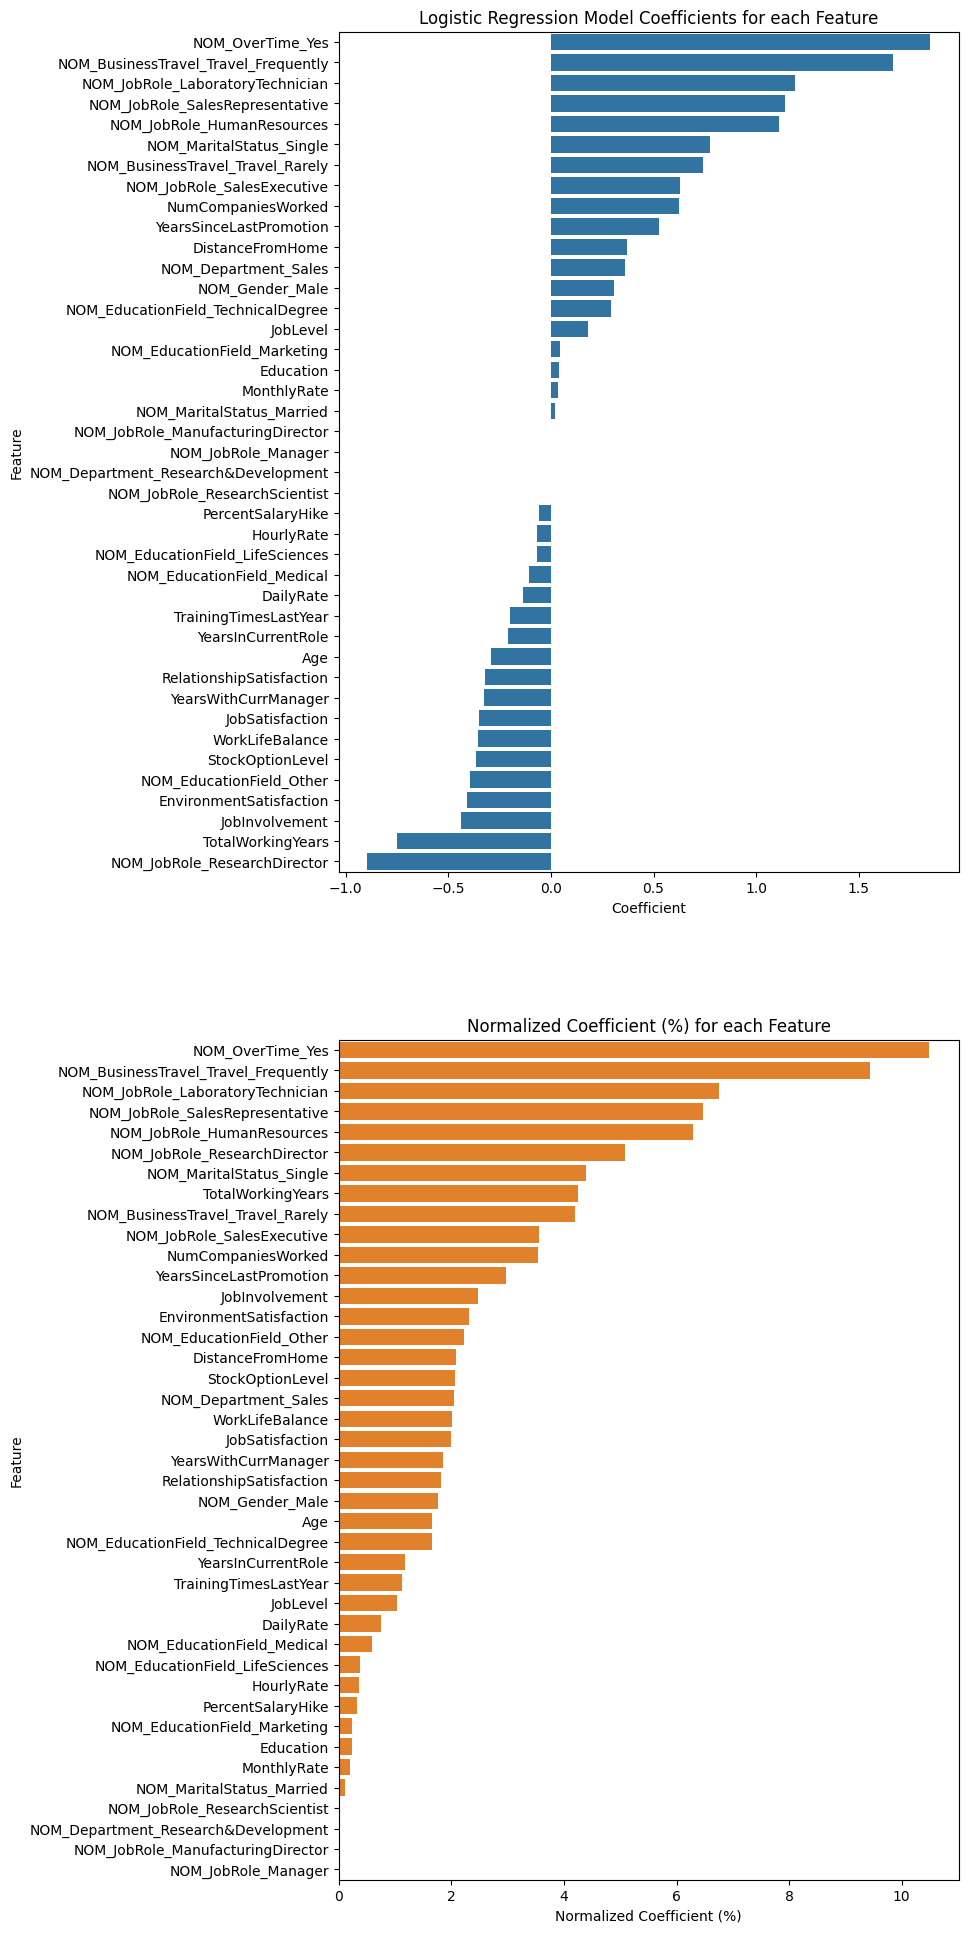

In [70]:
logistic_regression_coef = get_model_feature_importances(X_train, logistic_regression_model, coef=True)

plt.figure(figsize=(8, 24))
plt.subplot(2, 1, 1)
sns.barplot(
    data = logistic_regression_coef,
    y = "feature",
    x = "importance",
    color = sns.color_palette()[0]
)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Logistic Regression Model Coefficients for each Feature")

plt.subplot(2, 1, 2)
sns.barplot(
    data = logistic_regression_coef,
    y = "feature",
    x = "normalized_importance",
    color = sns.color_palette()[1],
    order = logistic_regression_coef.sort_values("normalized_importance", ascending = False, ignore_index = True).feature
)
plt.xlabel("Normalized Coefficient (%)")
plt.ylabel("Feature")
plt.title("Normalized Coefficient (%) for each Feature")


In [71]:
scores_dict = {
    "Logistic Regression" : {
        "Train" : roc_auc_score(y_train, logistic_regression_model.predict_proba(X_train)[:, 1]),
        "Test" : roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test)[:, 1])
    }
}

### 5.2. SVM

In [72]:
from sklearn.svm import SVC

In [73]:
svm_model = SVC(kernel = "rbf", random_state = 42)
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[862   1]
 [121  45]]
Accuracy: 0.8814382896015549
Precision: 0.9782608695652174
Recall: 0.2710843373493976
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.876907    0.978261  0.881438     0.927584      0.893258
recall       0.998841    0.271084  0.881438     0.634963      0.881438
f1-score     0.933911    0.424528  0.881438     0.679220      0.851737
support    863.000000  166.000000  0.881438  1029.000000   1029.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[368   2]
 [ 60  11]]
Accuracy: 0.8594104308390023
Precision: 0.8461538461538461
Recall: 0.15492957746478872
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.859813   0.846154   0.85941    0.852983      0.857614
recall       0.994595   0.154930   0.85941    0.574762      0.859410
f1-score     0.922306   0.261905   0.85941    0.592105      

In [74]:
svm_param_grid = {
    "C": [1, 10, 100, 1000],
    "kernel": ["linear", "rbf"],
    "gamma": [0.001, 0.0001]
}

svm_grid_search = GridSearchCV(SVC(random_state = 42), param_grid = svm_param_grid, scoring = "roc_auc", cv = 3, n_jobs = -1)
svm_grid_search.fit(X_train, y_train)
print(svm_grid_search.best_params_)
print(svm_grid_search.best_score_)
print(svm_grid_search.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.8520535326719997
SVC(C=100, gamma=0.001, random_state=42)


In [75]:
svm_model_best = SVC(**svm_grid_search.best_params_, random_state = 42, probability = True)
svm_model_best.fit(X_train, y_train)
evaluate_model(svm_model_best, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[852  11]
 [ 70  96]]
Accuracy: 0.9212827988338192
Precision: 0.897196261682243
Recall: 0.5783132530120482
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.924078    0.897196  0.921283     0.910637      0.919741
recall       0.987254    0.578313  0.921283     0.782784      0.921283
f1-score     0.954622    0.703297  0.921283     0.828959      0.914078
support    863.000000  166.000000  0.921283  1029.000000   1029.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[355  15]
 [ 46  25]]
Accuracy: 0.8616780045351474
Precision: 0.625
Recall: 0.352112676056338
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.885287   0.625000  0.861678    0.755143      0.843381
recall       0.959459   0.352113  0.861678    0.655786      0.861678
f1-score     0.920882   0.450450  0.861678    0.685666      0.845144
support

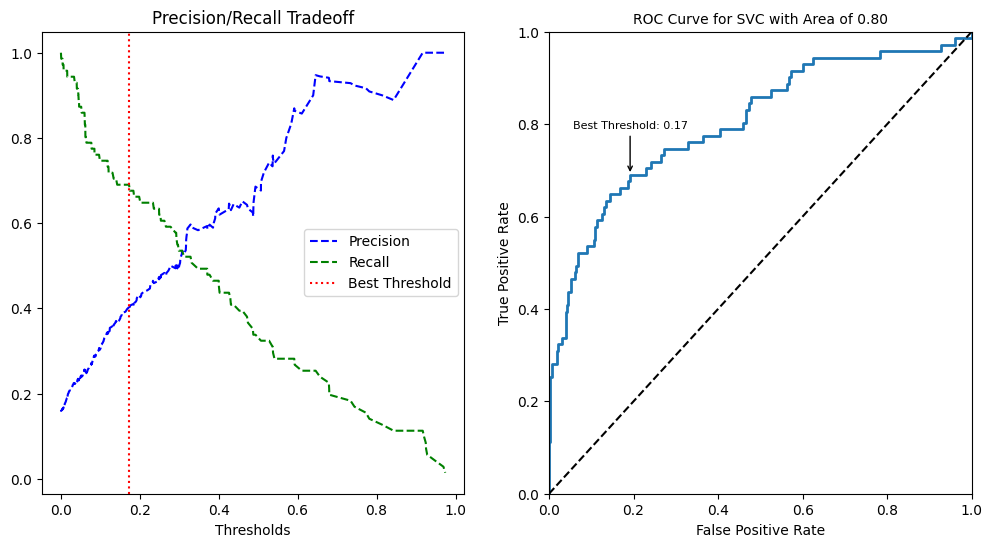

In [76]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(svm_model_best, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(svm_model_best, X_test, y_test)

We can't interpret the coef / features' importances from an RBF-SVM.

In [77]:
scores_dict["SVM"] = {
    "Train" : roc_auc_score(y_train, svm_model_best.predict_proba(X_train)[:, 1]),
    "Test" : roc_auc_score(y_test, svm_model_best.predict_proba(X_test)[:, 1])
}

### 5.3. Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
random_forest_model = RandomForestClassifier(random_state = 42)
random_forest_model.fit(X_train, y_train)
evaluate_model(random_forest_model, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[863   0]
 [  0 166]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0

==========TESTING  RESULTS===========
Confusion Matrix:
[[362   8]
 [ 63   8]]
Accuracy: 0.8390022675736961
Precision: 0.5
Recall: 0.11267605633802817
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.851765   0.500000  0.839002    0.675882      0.795131
recall       0.978378   0.112676  0.839002    0.545527      0.839002
f1-score     0.910692   0.183908  0.839002    0.547300      0.793681
support    370.000000  71.000000  0.839002  441.000000    441.000000


In [80]:
random_forest_param_grid = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [10, 25, 50],
    "min_samples_leaf": [0.01, 0.05, 0.15],
    "max_features": ["sqrt", "log2"]
}

In [81]:
random_forest_search = GridSearchCV(RandomForestClassifier(random_state = 42), random_forest_param_grid, scoring = "roc_auc", cv = 3, n_jobs = -1)
random_forest_search.fit(X_train, y_train)
print(random_forest_search.best_params_)
print(random_forest_search.best_score_)
print(random_forest_search.best_estimator_)

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 0.01, 'n_estimators': 1000}
0.8177266903312198
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=0.01,
                       n_estimators=1000, random_state=42)


In [82]:
random_forest_model_best = RandomForestClassifier(**random_forest_search.best_params_, random_state = 42)
random_forest_model_best.fit(X_train, y_train)
evaluate_model(random_forest_model_best, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[862   1]
 [139  27]]
Accuracy: 0.8639455782312925
Precision: 0.9642857142857143
Recall: 0.16265060240963855
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.861139    0.964286  0.863946     0.912712      0.877779
recall       0.998841    0.162651  0.863946     0.580746      0.863946
f1-score     0.924893    0.278351  0.863946     0.601622      0.820591
support    863.000000  166.000000  0.863946  1029.000000   1029.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[368   2]
 [ 66   5]]
Accuracy: 0.8458049886621315
Precision: 0.7142857142857143
Recall: 0.07042253521126761
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.847926   0.714286  0.845805    0.781106      0.826410
recall       0.994595   0.070423  0.845805    0.532509      0.845805
f1-score     0.915423   0.128205  0.845805    0.521814     

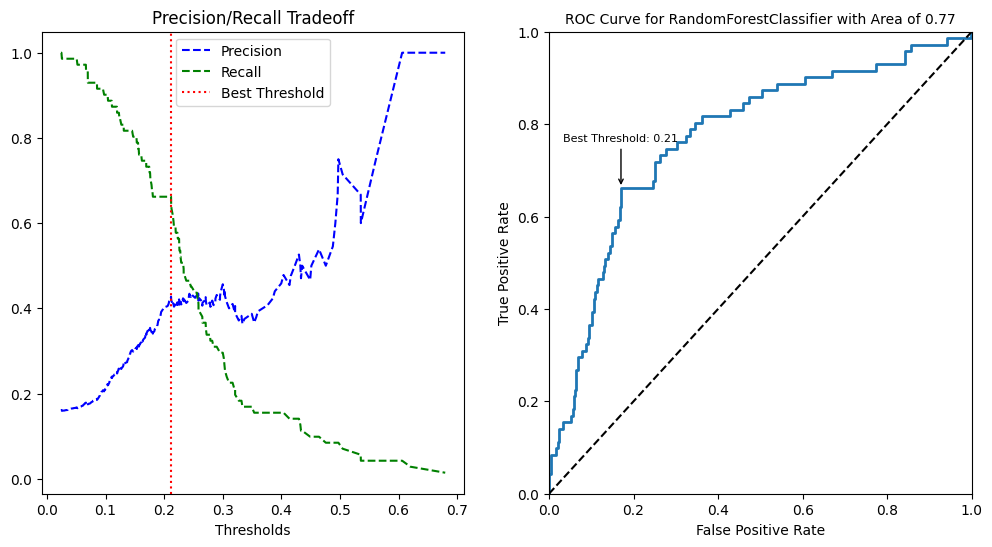

In [83]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(random_forest_model_best, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(random_forest_model_best, X_test, y_test)

Text(0.5, 1.0, 'Normalized Coefficient (%) for each Feature')

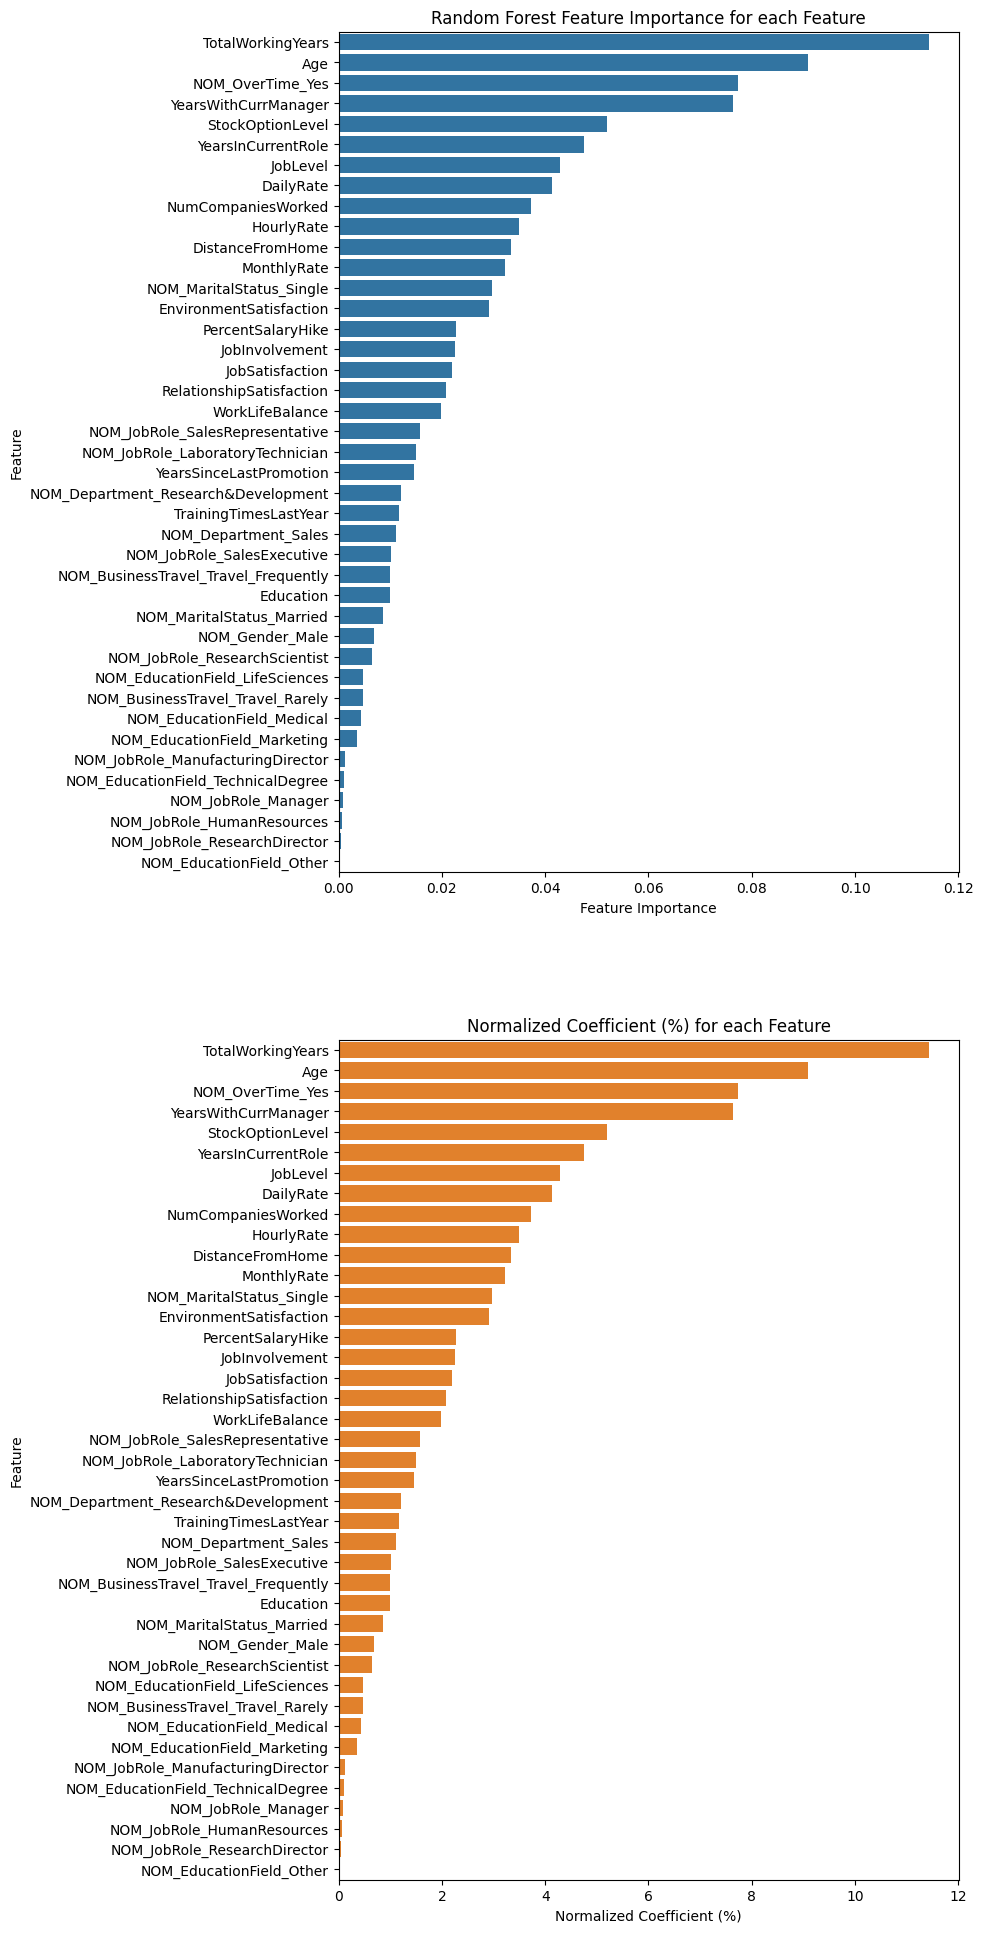

In [84]:
random_forest_importances = get_model_feature_importances(X_train, random_forest_model_best, coef=False)

plt.figure(figsize=(8, 24))
plt.subplot(2, 1, 1)
sns.barplot(
    data = random_forest_importances,
    y = "feature",
    x = "importance",
    color = sns.color_palette()[0]
)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance for each Feature")

plt.subplot(2, 1, 2)
sns.barplot(
    data = random_forest_importances,
    y = "feature",
    x = "normalized_importance",
    color = sns.color_palette()[1],
    order = random_forest_importances.sort_values("normalized_importance", ascending = False, ignore_index = True).feature
)
plt.xlabel("Normalized Coefficient (%)")
plt.ylabel("Feature")
plt.title("Normalized Coefficient (%) for each Feature")


### 5.4. Applyin SMOTE Oversampling

We got noticable good recall scores from our models, but we may want to check if oversampling can not only fix the imbalance problem but also enhance our models' precision.

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
smote_oversampler = SMOTE(random_state = 0)
X_train_os, y_train_os = smote_oversampler.fit_resample(X_train, y_train)

#### 5.4.1. SMOTE with Logistic Regression

In [87]:
logistic_regression_os_model = LogisticRegression(solver = "liblinear", penalty = "l1", random_state = 42)
logistic_regression_os_model.fit(X_train_os, y_train_os)
evaluate_model(logistic_regression_os_model, X_train_os, X_test, y_train_os, y_test)

==========TRAINING RESULTS===========
Confusion Matrix:
[[800  63]
 [ 99 764]]
Accuracy: 0.9061413673232909
Precision: 0.9238210399032648
Recall: 0.8852838933951332
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.889878    0.923821  0.906141     0.906849      0.906849
recall       0.926999    0.885284  0.906141     0.906141      0.906141
f1-score     0.908059    0.904142  0.906141     0.906101      0.906101
support    863.000000  863.000000  0.906141  1726.000000   1726.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[334  36]
 [ 42  29]]
Accuracy: 0.8231292517006803
Precision: 0.4461538461538462
Recall: 0.4084507042253521
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.888298   0.446154  0.823129    0.667226      0.817114
recall       0.902703   0.408451  0.823129    0.655577      0.823129
f1-score     0.895442   0.426471  0.823129    0.660956      0

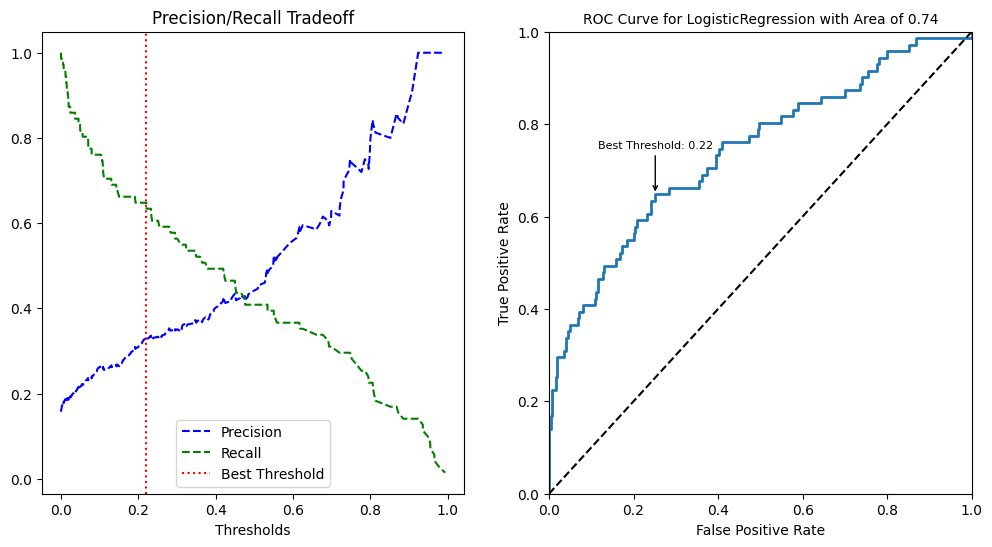

In [88]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(logistic_regression_os_model, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(logistic_regression_os_model, X_test, y_test)

Text(0.5, 1.0, 'Normalized Feature Importance (%) for each Feature')

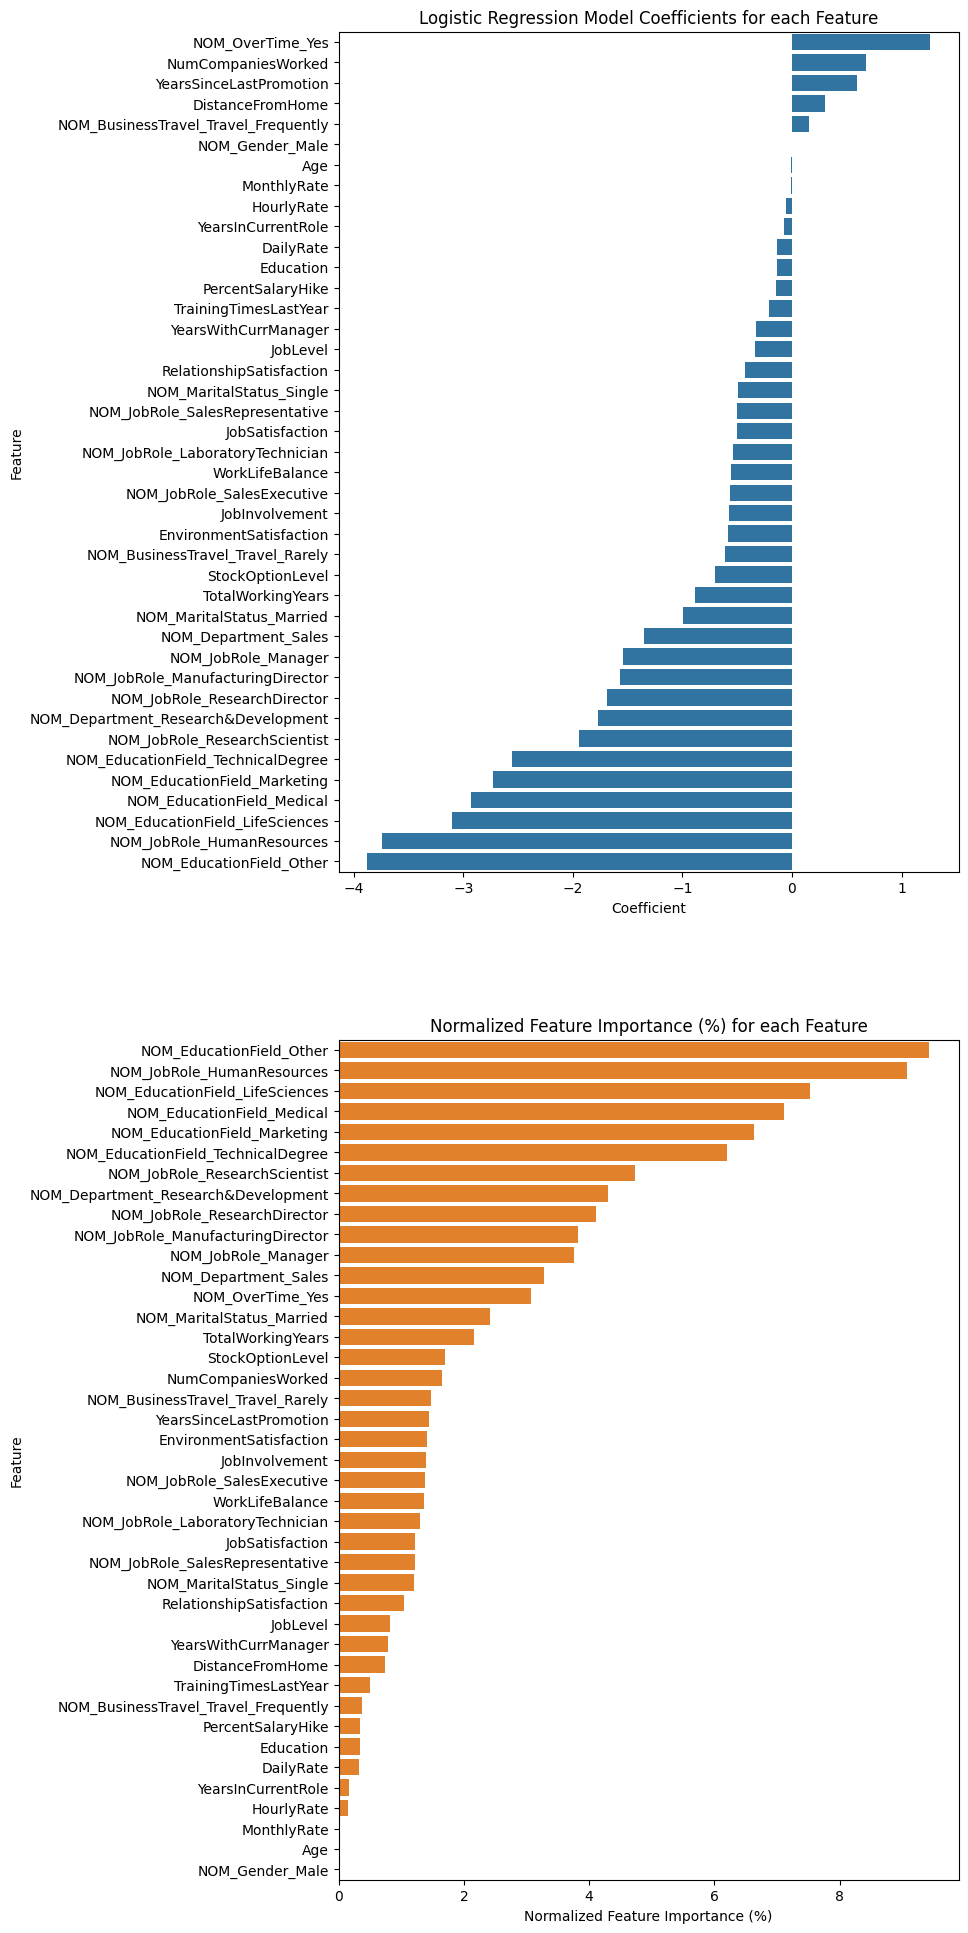

In [89]:
logistic_regression_os_importances = get_model_feature_importances(X_train_os, logistic_regression_os_model, coef=True)

plt.figure(figsize=(8, 24))
plt.subplot(2, 1, 1)
sns.barplot(
    data = logistic_regression_os_importances,
    y = "feature",
    x = "importance",
    color = sns.color_palette()[0]
)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Logistic Regression Model Coefficients for each Feature")

plt.subplot(2, 1, 2)
sns.barplot(
    data = logistic_regression_os_importances,
    y = "feature",
    x = "normalized_importance",
    color = sns.color_palette()[1],
    order = logistic_regression_os_importances.sort_values("normalized_importance", ascending = False, ignore_index = True).feature
)
plt.xlabel("Normalized Feature Importance (%)")
plt.ylabel("Feature")
plt.title("Normalized Feature Importance (%) for each Feature")


#### 5.4.2. SMOTE with SVM

In [90]:
svm_os_model = SVC(kernel = "rbf", random_state = 42)
svm_os_model.fit(X_train_os, y_train_os)
evaluate_model(svm_os_model, X_train_os, X_test, y_train_os.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[821  42]
 [ 82 781]]
Accuracy: 0.9281575898030128
Precision: 0.9489671931956257
Recall: 0.9049826187717266
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.909192    0.948967  0.928158     0.929079      0.929079
recall       0.951333    0.904983  0.928158     0.928158      0.928158
f1-score     0.929785    0.926453  0.928158     0.928119      0.928119
support    863.000000  863.000000  0.928158  1726.000000   1726.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[335  35]
 [ 44  27]]
Accuracy: 0.8208616780045351
Precision: 0.43548387096774194
Recall: 0.38028169014084506
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.883905   0.435484  0.820862    0.659694      0.811710
recall       0.905405   0.380282  0.820862    0.642844      0.820862
f1-score     0.894526   0.406015  0.820862    0.650271     

In [91]:
svm_param_grid = {
    "C": [1, 10, 100, 1000],
    "kernel": ["linear", "rbf"],
    "gamma": [0.001, 0.0001]
}

svm_os_grid_search = GridSearchCV(SVC(random_state = 42), param_grid = svm_param_grid, scoring = "roc_auc", cv = 3, n_jobs = -1)
svm_os_grid_search.fit(X_train_os, y_train_os)
print(svm_os_grid_search.best_params_)
print(svm_os_grid_search.best_score_)
print(svm_os_grid_search.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.9563948831659282
SVC(C=1000, gamma=0.001, random_state=42)


In [92]:
svm_os_model_best = SVC(**svm_os_grid_search.best_params_, random_state = 42, probability = True)
svm_os_model_best.fit(X_train_os, y_train_os)
evaluate_model(svm_os_model_best, X_train_os, X_test, y_train_os.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[841  22]
 [ 56 807]]
Accuracy: 0.9548088064889919
Precision: 0.9734620024125452
Recall: 0.9351100811123986
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.937570    0.973462  0.954809     0.955516      0.955516
recall       0.974508    0.935110  0.954809     0.954809      0.954809
f1-score     0.955682    0.953901  0.954809     0.954791      0.954791
support    863.000000  863.000000  0.954809  1726.000000   1726.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[337  33]
 [ 43  28]]
Accuracy: 0.8276643990929705
Precision: 0.45901639344262296
Recall: 0.39436619718309857
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.886842   0.459016  0.827664    0.672929      0.817963
recall       0.910811   0.394366  0.827664    0.652589      0.827664
f1-score     0.898667   0.424242  0.827664    0.661455     

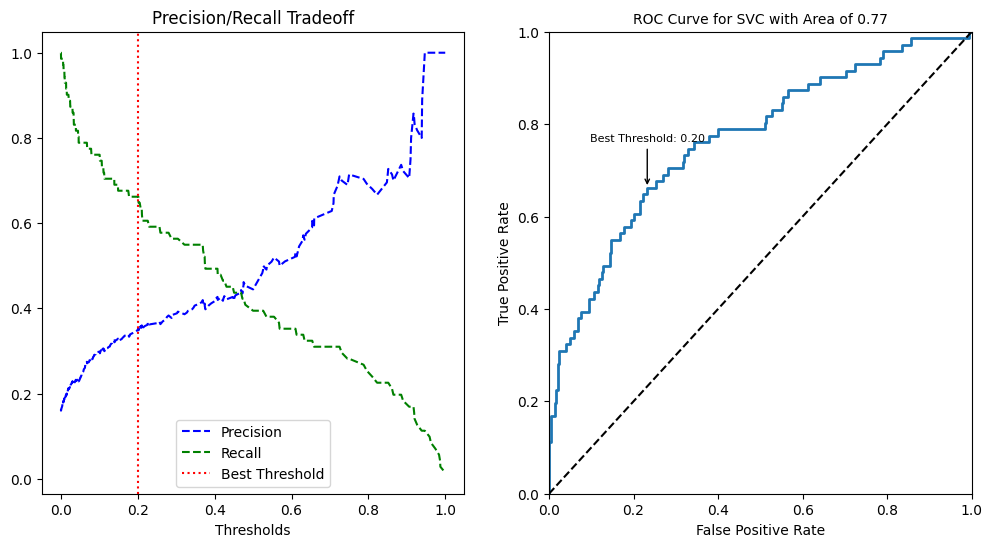

In [93]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(svm_os_model_best, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(svm_os_model_best, X_test, y_test)

#### 5.4.3. SMOTE with RandomForest

In [94]:
random_forest_os_model = RandomForestClassifier(random_state = 42)
random_forest_os_model.fit(X_train_os, y_train_os)
evaluate_model(random_forest_os_model, X_train_os, X_test, y_train_os.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[863   0]
 [  0 863]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  863.0       1.0     1726.0        1726.0

==========TESTING  RESULTS===========
Confusion Matrix:
[[346  24]
 [ 56  15]]
Accuracy: 0.81859410430839
Precision: 0.38461538461538464
Recall: 0.2112676056338028
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.860697   0.384615  0.818594    0.622656      0.784049
recall       0.935135   0.211268  0.818594    0.573201      0.818594
f1-score     0.896373   0.272727  0.818594    0.584550      0.795967
support    370.000000  71.000000  0.818594  441.000000    441.000000


In [95]:
random_forest_param_grid = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [10, 25, 50],
    "min_samples_leaf": [0.01, 0.05, 0.15],
    "max_features": ["sqrt", "log2"]
}

random_forest_os_search = GridSearchCV(RandomForestClassifier(random_state = 42), random_forest_param_grid, scoring = "roc_auc", cv = 3)
random_forest_os_search.fit(X_train_os, y_train_os)
print(random_forest_os_search.best_params_)
print(random_forest_os_search.best_score_)
print(random_forest_os_search.best_estimator_)

{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 0.01, 'n_estimators': 1000}
0.9531140918944739
RandomForestClassifier(max_depth=25, max_features='log2', min_samples_leaf=0.01,
                       n_estimators=1000, random_state=42)


In [96]:
random_forest_os_model_best = RandomForestClassifier(**random_forest_os_search.best_params_, random_state = 42)
random_forest_os_model_best.fit(X_train, y_train)
evaluate_model(random_forest_os_model_best, X_train_os, X_test, y_train_os.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[862   1]
 [728 135]]
Accuracy: 0.5776361529548089
Precision: 0.9926470588235294
Recall: 0.1564310544611819
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.542138    0.992647  0.577636     0.767393      0.767393
recall       0.998841    0.156431  0.577636     0.577636      0.577636
f1-score     0.702813    0.270270  0.577636     0.486542      0.486542
support    863.000000  863.000000  0.577636  1726.000000   1726.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[368   2]
 [ 66   5]]
Accuracy: 0.8458049886621315
Precision: 0.7142857142857143
Recall: 0.07042253521126761
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.847926   0.714286  0.845805    0.781106      0.826410
recall       0.994595   0.070423  0.845805    0.532509      0.845805
f1-score     0.915423   0.128205  0.845805    0.521814      

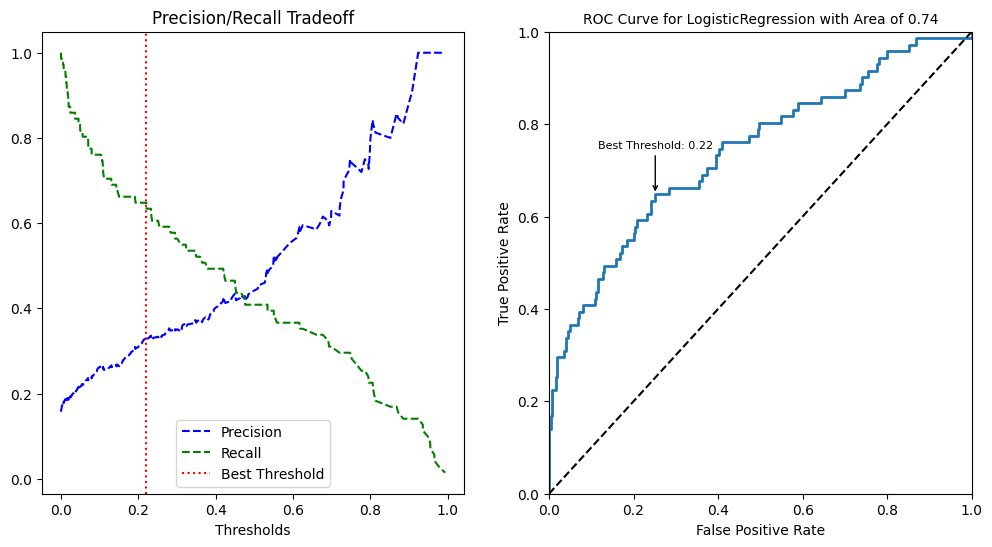

In [97]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(logistic_regression_os_model, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(logistic_regression_os_model, X_test, y_test)

Text(0.5, 1.0, 'Normalized Coefficient (%) for each Feature')

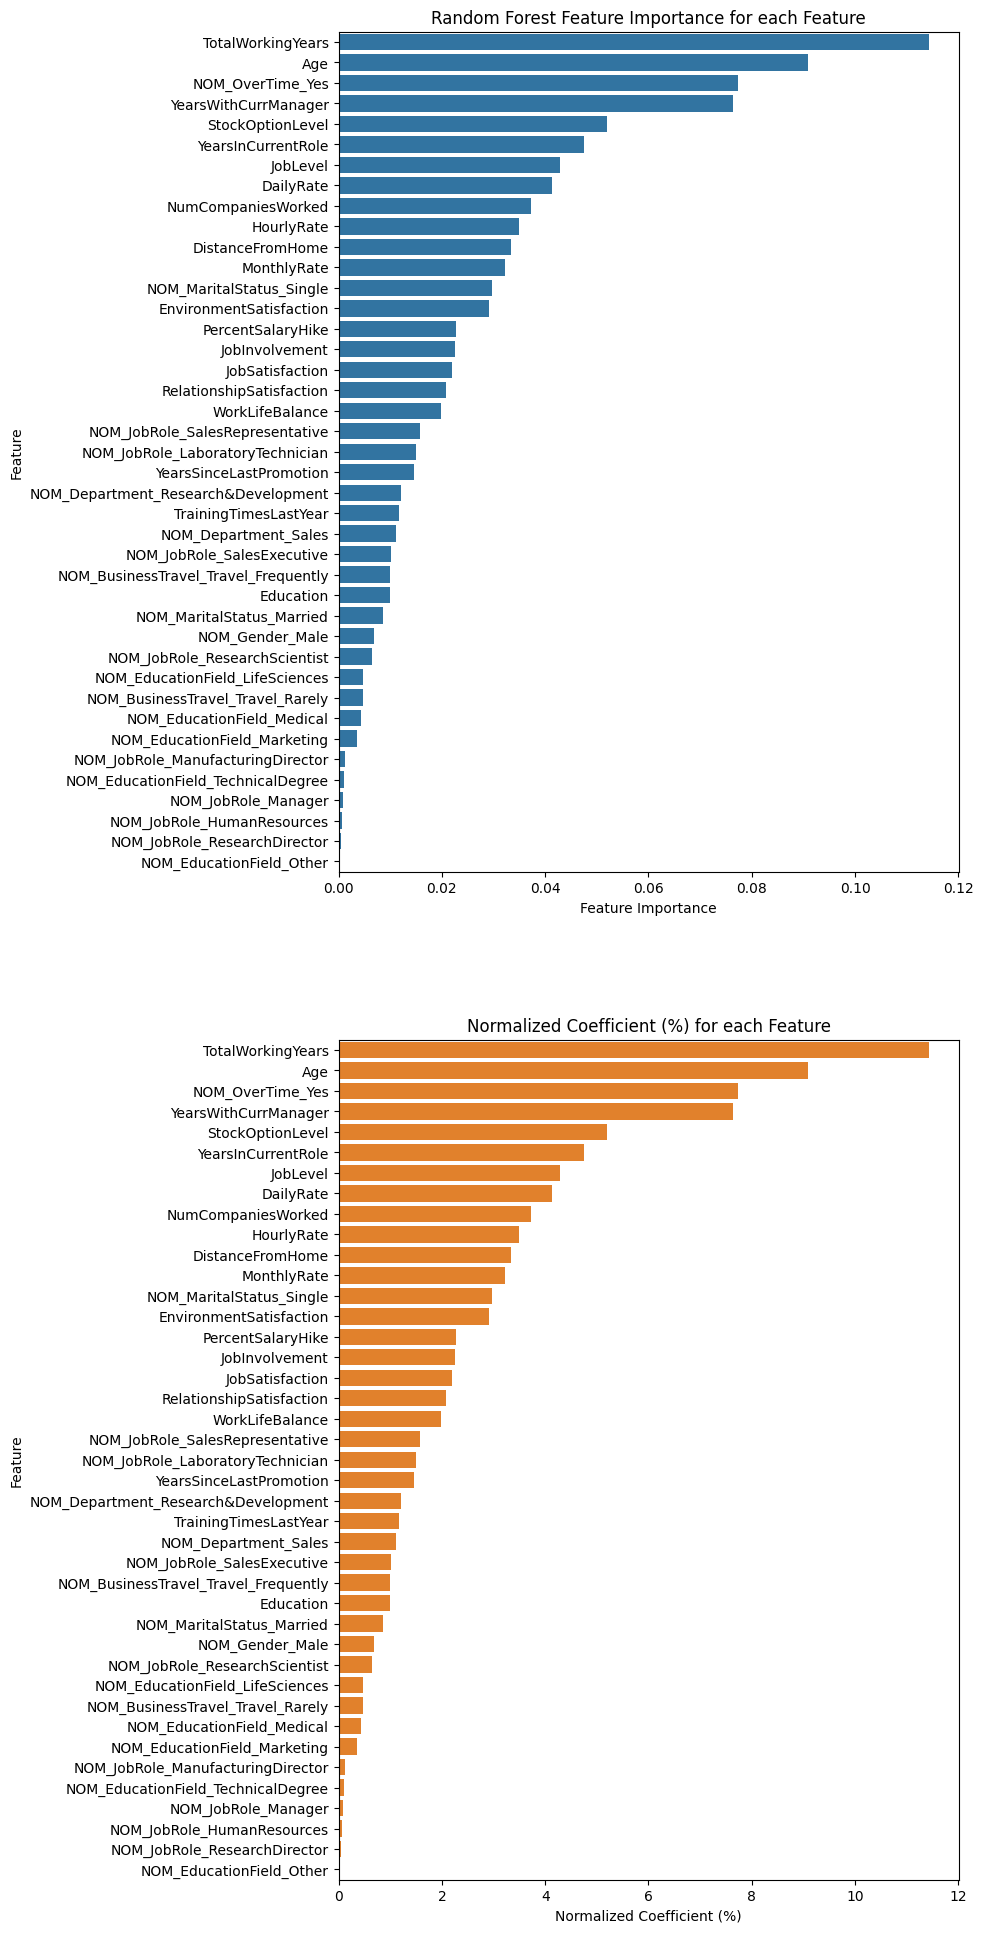

In [98]:
random_forest_os_importances = get_model_feature_importances(X_train_os, random_forest_model_best, coef=False)

plt.figure(figsize=(8, 24))
plt.subplot(2, 1, 1)
sns.barplot(
    data = random_forest_os_importances,
    y = "feature",
    x = "importance",
    color = sns.color_palette()[0]
)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance for each Feature")

plt.subplot(2, 1, 2)
sns.barplot(
    data = random_forest_os_importances,
    y = "feature",
    x = "normalized_importance",
    color = sns.color_palette()[1],
    order = random_forest_os_importances.sort_values("normalized_importance", ascending = False, ignore_index = True).feature
)
plt.xlabel("Normalized Coefficient (%)")
plt.ylabel("Feature")
plt.title("Normalized Coefficient (%) for each Feature")

In [99]:
new = ''
for i in 'Hello':
    if i != 'l':
        new +=i
        
print(new)

Heo
